# HDF5 file creation

In [1]:
from src import _PATH_DATA
import numpy as np
import pandas as pd
from tifffile import tifffile
import h5py

In [2]:
files = pd.read_csv(f"{_PATH_DATA}/synthetic_fibers/train.csv", header=0).img_path.to_list()

In [3]:
def create_hdf5_dataset(files, hdf5_path):
    # Open the first image to get the shape
    img_shape = tifffile.imread(f"{_PATH_DATA}/{files[0]}").shape
    
    # Create HDF5 file
    with h5py.File(hdf5_path, 'w') as hdf5_file:
        # Create a dataset in the file
        dataset = hdf5_file.create_dataset('volumes', (len(files), 300,300), dtype='uint8')
        
        # Loop through all images and save them to the dataset
        for i, file in enumerate(files):
            vol = tifffile.imread(f"{_PATH_DATA}/{file}")
            vol -= vol.min()
            vol = vol/vol.max()
            vol = vol.transpose(2,1,0)
            dataset[i] = vol[:,:,150]
# Usage
create_hdf5_dataset(files, f"{_PATH_DATA}/synthetic_fibers/train_slice.hdf5")


In [4]:
with h5py.File(f"{_PATH_DATA}/synthetic_fibers/train_slice.hdf5", 'r') as f:
    dataset = f["volumes"]
    print(dataset.shape)

(1000, 300, 300)


In [2]:
1000*300/10

30000.0

In [65]:
import qim3d
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm.notebook import tqdm
import pandas as pd
from skimage.draw import ellipse
from src import _PATH_DATA
import h5py
from skimage.transform import resize

In [66]:
files = []
# files.append(glob(f"{_PATH_DATA}/Task10_Colon/imagesTr/*.nii.gz"))
# files.append(glob(f"{_PATH_DATA}/Task10_Colon/imagesTs/*.nii.gz"))
# files.append(glob(f"{_PATH_DATA}/Task03_Liver/imagesTr/*.nii.gz"))
# files.append(glob(f"{_PATH_DATA}/Task03_Liver/imagesTs/*.nii.gz"))
files.append(glob(f"{_PATH_DATA}/Task07_Pancreas/imagesTr/*.nii.gz"))
files.append(glob(f"{_PATH_DATA}/Task07_Pancreas/imagesTs/*.nii.gz"))
# files.append(glob(f"{_PATH_DATA}/Task09_Spleen/imagesTr/*.nii.gz"))
# files.append(glob(f"{_PATH_DATA}/Task09_Spleen/imagesTs/*.nii.gz"))
files = [item for sublist in files for item in sublist]

In [67]:
shapes = {}
for file in tqdm(files):
    vol = qim3d.io.load(file,progress_bar=False,virtual_stack=True)
    
    shapes[file] = {"x":vol.shape[0],
               "y":vol.shape[1],
               "z":vol.shape[2],}

  0%|          | 0/420 [00:00<?, ?it/s]

Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack


In [68]:
df = pd.DataFrame.from_dict(shapes,orient="index")

(array([ 28.,  16.,  41., 137., 133.,  37.,  11.,   6.,   3.,   4.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 37.  ,  51.28,  65.56,  79.84,  94.12, 108.4 , 122.68, 136.96,
        151.24, 165.52, 179.8 , 194.08, 208.36, 222.64, 236.92, 251.2 ,
        265.48, 279.76, 294.04, 308.32, 322.6 , 336.88, 351.16, 365.44,
        379.72, 394.  , 408.28, 422.56, 436.84, 451.12, 465.4 , 479.68,
        493.96, 508.24, 522.52, 536.8 , 551.08, 565.36, 579.64, 593.92,
        608.2 , 622.48, 636.76, 651.04, 665.32, 679.6 , 693.88, 708.16,
        722.44, 736.72, 751.  ]),
 <BarContainer object of 50 artists>)

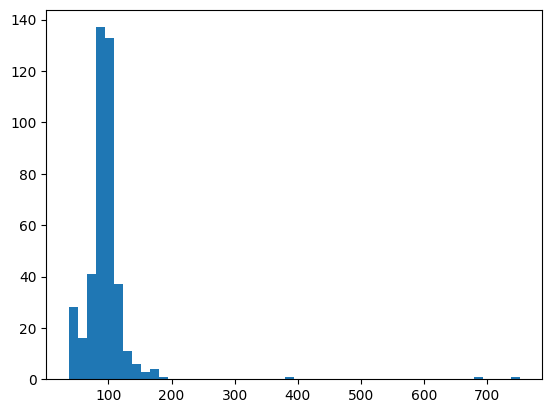

In [69]:
plt.hist(df.z,bins=50)

In [70]:
def create_hdf5_dataset(files, hdf5_path):
    # Open the first image to get the shape
    vol_shape = (256,256,50)
    
    # Create HDF5 file
    with h5py.File(hdf5_path, 'w') as hdf5_file:
        # Create a dataset in the file
        dataset = hdf5_file.create_dataset('volumes', (len(files), *vol_shape), dtype='float32')
        
        # Loop through all images and save them to the dataset
        for i, file in tqdm(enumerate(files),unit="vol", desc="Saving volumes to hdf5 file"):
            vol = qim3d.io.load(file,progress_bar=False)
            vol = np.clip(vol, -1000,500)
            vol -= vol.min()
            vol /= vol.max()
        
            diff = 100-vol.shape[2]
            if diff == 0:
                vol = vol
            elif 2*(diff//2)+vol.shape[2] != 100:
                vol = np.pad(vol,((0,0),(0,0),(diff//2,diff//2+1)))
            else:
                vol = np.pad(vol,((0,0),(0,0),(diff//2,diff//2)))
                
            vol = resize(vol,(256,256,50), anti_aliasing=True)
            
            dataset[i] = vol

In [83]:
df2 = pd.DataFrame(df.index[df.z<100], columns=["file_path"])

In [79]:
df2.to_csv(f"{_PATH_DATA}/Task07_Pancreas/train.csv",index=False)

In [ ]:
create_hdf5_dataset(list(df2.file_path), f"{_PATH_DATA}/Task07_Pancreas/train_small.hdf5")

In [85]:
vol_shape = (256,256,376)
    
# Create HDF5 file
with h5py.File(f"{_PATH_DATA}/Task07_Pancreas/train_one.hdf5", 'w') as hdf5_file:
    # Create a dataset in the file
    dataset = hdf5_file.create_dataset('volumes', (1, *vol_shape), dtype='float32')

    vol = qim3d.io.load('/work3/s164564/CT-Reconstruction-Neural-Representation/data/Task07_Pancreas/imagesTr/pancreas_409.nii.gz',progress_bar=False)
    vol = np.clip(vol, -1000,500)
    vol -= vol.min()
    vol /= vol.max()

    vol = np.pad(vol,((0,0),(0,0),(0,1)))
        
    vol = resize(vol,(256,256,376), anti_aliasing=True)
    
    dataset[0] = vol


qim3d.viz.vol(vol)

Volume using 751.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 30.0 GB (4.0%)
 • Free..: 725.0 GB (96.0%)


Output()

In [114]:
376/8

47.0

<BarContainer object of 50 artists>

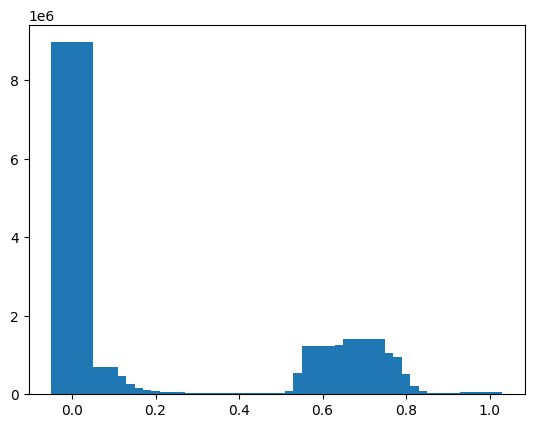

In [251]:
hist, bin_edge = np.histogram(vol,bins=50)
plt.bar(bin_edge[:-1],hist,width=0.1)

In [183]:
bin_edge

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ], dtype=float32)

In [191]:
qim3d.viz.slicer(vol,axis=2)

interactive(children=(IntSlider(value=43, description='Slice', max=86), Output()), layout=Layout(align_items='…

In [15]:
with h5py.File(f"{_PATH_DATA}/Task07_Pancreas/train.hdf5", 'r') as f:
    dataset = f["volumes"]
    vol = dataset[0,:,:,:]

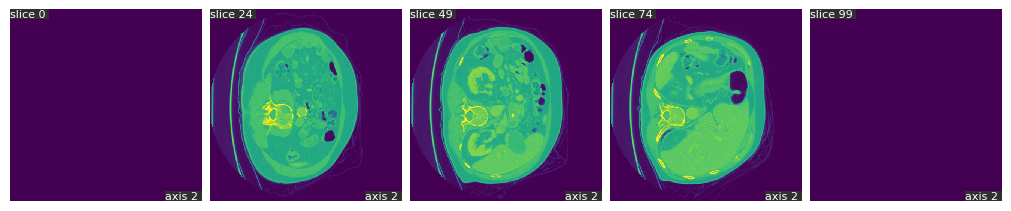

In [18]:
qim3d.viz.slices(vol,axis=2)

In [20]:
qim3d.viz.slicer(vol,axis=2)

interactive(children=(IntSlider(value=50, description='Slice', max=99), Output()), layout=Layout(align_items='…

In [19]:
qim3d.viz.vol(vol)

Output()

In [7]:
import numpy as np
import qim3d
import h5py
from src import _PATH_DATA
from scipy.ndimage import gaussian_filter

In [2]:
data=np.ones((25,100,100,100),dtype="float32")*0.1
counter = 0
for i in range(5):
    for j in range(5):
        data[counter,i*20:(i+1)*20,j*20:(j+1)*20,:] = 1
        counter += 1

data = gaussian_filter(data, sigma=1, mode="constant",axes=(1,2,3))
vol_shape = data.shape

In [3]:
# Create HDF5 file
with h5py.File(f"{_PATH_DATA}/cube_data.hdf5", 'w') as hdf5_file:
    # Create a dataset in the file
    dataset = hdf5_file.create_dataset('volumes', (25,100,100,100), dtype='float32')
    dataset[:,:,:,:] = data

In [6]:
with h5py.File(f"{_PATH_DATA}/cube_data-Copy1.hdf5", 'r') as f:
    dataset = f["volumes"]
    print(dataset.shape)
    qim3d.viz.vol(dataset[1])

(25, 100, 100, 100)


Output()

In [12]:
data = qim3d.io.load(f"{_PATH_DATA}/FiberDataset/filaments_volume_10.nii")
qim3d.viz.vol(data)

Loading:   0%|          | 0.00B/64.0MB  [00:00<?, ?B/s]

Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 71.4 GB (9.5%)
 • Free..: 683.6 GB (90.5%)


Output()

In [1]:
import qim3d
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm.notebook import tqdm
import pandas as pd
from src import _PATH_DATA
import h5py

In [31]:
files = glob(f"{_PATH_DATA}/FiberDataset/filaments_volume*.nii")

In [32]:
df = pd.DataFrame(data=files, columns=["vol_path"])

In [47]:
df.to_csv(f"{_PATH_DATA}/FiberDataset/filaments_volumes.csv",index=False)

In [55]:
def create_hdf5_dataset(files, hdf5_path):
    # Open the first image to get the shape
    vol_shape = (256,256,256)
    
    # Create HDF5 file
    with h5py.File(hdf5_path, 'w') as hdf5_file:
        # Create a dataset in the file
        dataset = hdf5_file.create_dataset('volumes', (len(files), *vol_shape), dtype='float32')
        
        # Loop through all images and save them to the dataset
        for i, file in tqdm(enumerate(files),unit="vol", desc="Saving volumes to hdf5 file"):
            vol = qim3d.io.load(file,progress_bar=False)
            vol = vol.transpose(2,1,0)
            dataset[i] = vol

In [56]:
create_hdf5_dataset(df.vol_path.to_list(),f"{_PATH_DATA}/FiberDataset/filaments_volumes.hdf5")

Saving volumes to hdf5 file: 0vol [00:00, ?vol/s]

Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory



(300, 256, 256, 256)


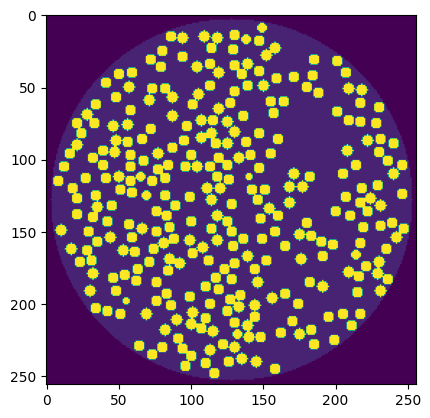

In [57]:
with h5py.File(f"{_PATH_DATA}/FiberDataset/filaments_volumes.hdf5", 'r') as f:
    dataset = f["volumes"]
    print(dataset.shape)
    plt.imshow(dataset[0][:,:,50])
    

In [1]:
import qim3d
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm.notebook import tqdm
import pandas as pd
from src import _PATH_DATA
import h5py

In [2]:
df = pd.read_csv(f"{_PATH_DATA}/bugnist_256/SL_test_files.csv")

In [3]:
def create_hdf5_dataset(files, hdf5_path):
    # Open the first image to get the shape
    vol_shape = (192,160,160)
    
    # Create HDF5 file
    with h5py.File(hdf5_path, 'w') as hdf5_file:
        # Create a dataset in the file
        dataset = hdf5_file.create_dataset('volumes', (len(files), *vol_shape), dtype='float32')
        
        # Loop through all images and save them to the dataset
        for i, file in tqdm(enumerate(files),unit="vol", desc="Saving volumes to hdf5 file"):
            vol = qim3d.io.load(file,progress_bar=False)
            vol -= vol.min()
            vol = vol/vol.max()
            new_vol = np.zeros((192,160,160))
            new_vol[:,:,16:144] = vol
            vol = new_vol
            dataset[i] = vol

In [4]:
create_hdf5_dataset(df.file_name.to_list(),f"{_PATH_DATA}/bugnist_256/SL_cubed.hdf5")

Saving volumes to hdf5 file: 0vol [00:00, ?vol/s]

Loaded shape: (192, 160, 128)
Volume using 3.8 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 24.8 GB (3.3%)
 • Free..: 730.2 GB (96.7%)
Loaded shape: (192, 160, 128)
Volume using 3.8 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 24.9 GB (3.3%)
 • Free..: 730.2 GB (96.7%)
Loaded shape: (192, 160, 128)
Volume using 3.8 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 24.9 GB (3.3%)
 • Free..: 730.2 GB (96.7%)
Loaded shape: (192, 160, 128)
Volume using 3.8 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 24.9 GB (3.3%)
 • Free..: 730.2 GB (96.7%)
Loaded shape: (192, 160, 128)
Volume using 3.8 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 24.9 GB (3.3%)
 • Free..: 730.2 GB (96.7%)
Loaded shape: (192, 160, 128)
Volume using 3.8 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 24.9 GB (3.3%)
 • Free..: 730.2 GB (96.7%)
Loaded shape: (192, 160, 128)
Volume using 3.8 MB of memory

System memory:
 • Total.: 755.0 GB
 • U

(689, 192, 160, 128)


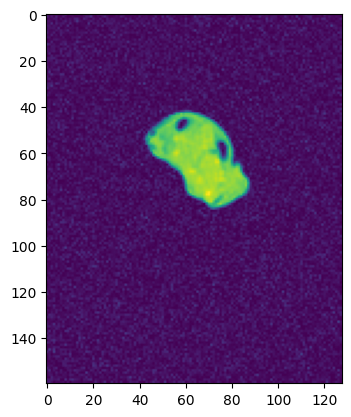

In [80]:
with h5py.File(f"{_PATH_DATA}/bugnist_256/SL_cubed.hdf5", 'r') as f:
    dataset = f["volumes"]
    print(dataset.shape)
    plt.imshow(dataset[15][100,:,:])

# Test pretrained model

In [3]:
import numpy as np
import pandas as pd
import tifffile
from tqdm.notebook import tqdm
import scipy.ndimage as ndi
import h5py
import qim3d

import torch
import torch._dynamo

from src.dataloaders import CTDataModule
# from src.models.mlp import compute_projection_values, NeuralField, NeuralField_adversarial
from src import get_device, _PATH_DATA, _PATH_MODELS
import matplotlib.pyplot as plt

from IPython.display import HTML
from base64 import b64encode
import matplotlib.animation as animation
from pylab import *

def ani_frame(frames,name="video"):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    im = ax.imshow(frames[0],cmap='gray',interpolation="none")
    im.set_clim([0,255])
    fig.set_size_inches([5,5])


    tight_layout()


    def update_img(n):
        tmp = frames[n]
        im.set_data(tmp)
        return im

    #legend(loc=0)
    ani = animation.FuncAnimation(fig,update_img,frames.shape[0],interval=300)
    writer = animation.writers['ffmpeg'](fps=10)

    ani.save(f'{name}.mp4',writer=writer,dpi=100)
    return ani

args_dict = {
    "general": {
        "experiment_name": "test",
        "data_path":f'cube_data.hdf5',
        "seed":42,
        "checkpoint_path":"imagefit_cube_adversarial_None_sine_latent-size-32-2024-09-19-1457/last.ckpt",
        
    },
    "training": {
        "num_epochs": 1,
        "batch_size": 100,
        "model_lr":1e-4,
        "latent_lr":1e-4,
        "device":"cuda",
        "num_workers":0,
        "num_points":512,
        "imagefit_mode":True,
        "noisy_points":False,
        "regularization_weight":1e-1,
        "noise_level":0.03,
        "full_mode":False,
        "adversarial_mode":True,
    },
    "model": { 
        "model_type": "neuralfield",
        "num_hidden_layers": 5,
        "num_hidden_features": 64,
        "num_freq_bands": 6,
        "encoder":None,
        "activation_function": 'sine',
        "latent_size": 32,
        "volume_sidelength": (100,100,100),
    },
}

In [8]:
num_volumes = h5py.File(f"{_PATH_DATA}/{args_dict['general']['data_path']}", "r")["volumes"].shape[0]
# projection_shape = np.load(f"{args_dict['general']['data_path']}_projections.npy").shape
model = NeuralField_adversarial(args_dict, 
            projection_shape=(300,300),
            num_volumes=num_volumes,
           ).to(args_dict['training']['device'])

checkpoint_path = f"{_PATH_MODELS}/{args_dict['general']['checkpoint_path']}"
model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], strict=False)
model.eval();
model.cuda();

/tmp/ipykernel_823289/3049977548.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], stri

In [9]:
idx = 0
with h5py.File(f"{_PATH_DATA}/cube_data.hdf5", 'r') as f:
    dataset = f["volumes"]
    img = dataset[idx]
    # img = img.transpose(2,0,1)

mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, img.shape[0]), torch.linspace(-1, 1, img.shape[1]), torch.linspace(-1, 1, img.shape[1]), indexing='ij'),dim=-1)
outputs = torch.zeros_like(torch.tensor(img),dtype=torch.float)
for i in tqdm(range(mgrid.shape[0])):
    with torch.no_grad():
        vec = model.lat_vecs(torch.tensor([idx],device="cuda")).repeat(mgrid[i].shape[0],mgrid[i].shape[1],1,1).permute(2,0,1,3).contiguous().view(-1,args_dict['model']['latent_size'])
        outputs[i] = model(mgrid[i].view(-1,3).cuda(), vec).view(outputs[i].shape)


print(outputs.min())
print(outputs.max())

outputs -= outputs.min()
outputs /= outputs.max()
# tifffile.imwrite(f"reconstruction_mlp_{idx}.tif",(outputs.numpy()*255).astype("uint8"))
# tifffile.imwrite(f"real_vol_{idx}.tif",(img*255).astype("uint8"))

  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.0977)
tensor(0.8999)


In [10]:
qim3d.viz.vol(outputs.detach().cpu().numpy())

Output()

In [11]:
vectors = model.lat_vecs(torch.arange(25,device="cuda")).detach().cpu()

In [12]:
# pdist = torch.nn.PairwiseDistance(p=2)
# smallest_dist = 999999
# smallest_idx = 0
# for i in range(1,1000):
#     dist = pdist(vectors[0],vectors[i])
#     if dist < smallest_dist:
#         smallest_dist = dist
#         smallest_idx = i

In [13]:
idx = 24
with h5py.File(f"{_PATH_DATA}/cube_data.hdf5", 'r') as f:
    dataset = f["volumes"]
    img = dataset[idx]
    img = img.transpose(2,0,1)

mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, img.shape[0]), torch.linspace(-1, 1, img.shape[1]), torch.linspace(-1, 1, img.shape[1]), indexing='ij'),dim=-1)
outputs = torch.zeros_like(torch.tensor(img),dtype=torch.float)
for i in tqdm(range(mgrid.shape[0])):
    with torch.no_grad():
        vec = model.lat_vecs(torch.tensor([idx],device="cuda")).repeat(mgrid[i].shape[0],mgrid[i].shape[1],1,1).permute(2,0,1,3).contiguous().view(-1,args_dict['model']['latent_size'])
        outputs[i] = model(mgrid[i].view(-1,3).cuda(), vec).view(outputs[i].shape)


print(outputs.min())
print(outputs.max())

outputs -= outputs.min()
outputs /= outputs.max()
# tifffile.imwrite(f"reconstruction_mlp_{idx}.tif",(outputs.numpy()*255).astype("uint8"))
# tifffile.imwrite(f"real_vol_{idx}.tif",(img*255).astype("uint8"))

  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.0976)
tensor(0.9000)


In [14]:
qim3d.viz.vol(outputs.detach().cpu().numpy())

Output()

In [15]:
smallest_idx = 24
for j in tqdm(range(101)):
    start = model.lat_vecs(torch.tensor([0],device="cuda")).detach()
    end = model.lat_vecs(torch.tensor([smallest_idx],device="cuda")).detach()
    vec_inter = torch.lerp(start,end,j/100)
    
    idx = smallest_idx
    with h5py.File(f"{_PATH_DATA}/cube_data.hdf5", 'r') as f:
        dataset = f["volumes"]
        img = dataset[idx]
        img = img.transpose(2,0,1)
    
    mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, img.shape[0]), torch.linspace(-1, 1, img.shape[1]), torch.linspace(-1, 1, img.shape[1]), indexing='ij'),dim=-1)
    outputs = torch.zeros_like(torch.tensor(img),dtype=torch.float)
    for i in range(mgrid.shape[0]):
        with torch.no_grad():
            vec = vec_inter.repeat(mgrid[i].shape[0],mgrid[i].shape[1],1,1).permute(2,0,1,3).contiguous().view(-1,args_dict['model']['latent_size'])
            outputs[i] = model(mgrid[i].view(-1,3).cuda(), vec).view(outputs[i].shape)
    
    outputs -= outputs.min()
    outputs /= outputs.max()
    tifffile.imwrite(f"interpolations_cube/reconstruction_mlp_{0}-{smallest_idx}_{j}-percent.tif",(outputs.numpy()*255).astype("uint8"))

  0%|          | 0/101 [00:00<?, ?it/s]

In [17]:
qim3d.viz.vol(tifffile.imread(f"interpolations_cube/reconstruction_mlp_0-{smallest_idx}_50-percent.tif"))

Output()

In [19]:
frames = []
start = tifffile.imread(f"interpolations_cube/reconstruction_mlp_0-{smallest_idx}_0-percent.tif")[:,:,50]
end = tifffile.imread(f"interpolations_cube/reconstruction_mlp_0-{smallest_idx}_100-percent.tif")[:,:,50]
for _ in range(10):
    frames.append(start)
for i in range(1,100):
    frames.append(tifffile.imread(f"interpolations_cube/reconstruction_mlp_0-{smallest_idx}_{i}-percent.tif")[:,:,50])
for _ in range(10):
    frames.append(end)
frames = np.array(frames)

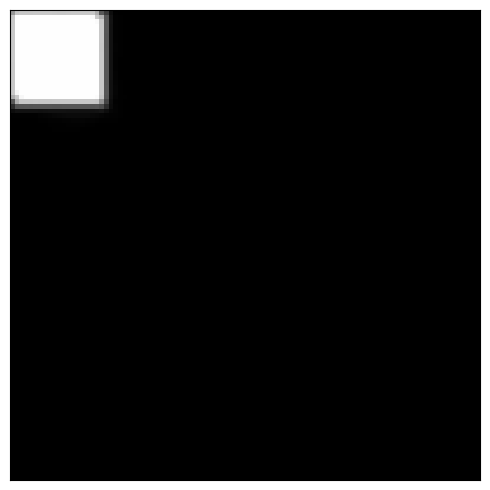

In [25]:
name = "interpolation_cube"
ani = ani_frame(frames,name=name)

In [4]:
name = "interpolation_cube"
mp4 = open(f'{name}.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=720 controls autoplay loop>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [5]:
name = "cube_latent_space"
mp4 = open(f'{name}.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=720 controls autoplay loop>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [6]:
name = "cube_latent_space_adversarial"
mp4 = open(f'{name}.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=720 controls autoplay loop>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

| Data                	| FWP 	| SIRT 	| ours w/o pretrained 	| Ours 	|
|---------------------	|-----	|------	|---------------------	|------	|
| fiber plenoptic 6x6 	|     	|      	|                     	|      	|
| fiber plenoptic 5x5 	|     	|      	|                     	|      	|
| fiber plenoptic 4x4 	|     	|      	|                     	|      	|
| fiber plenoptic 3x3 	|     	|      	|                     	|      	|
| fiber rotation 36   	|     	|      	|                     	|      	|
| fiber rotation 25   	|     	|      	|                     	|      	|
| fiber rotation 16   	|     	|      	|                     	|      	|
| fiber rotation 9    	|     	|      	|                     	|      	|
| Other dataset       	|     	|      	|                     	|      	|
| yet another dataset 	|     	|      	|                     	|      	|
| ...                 	|     	|      	|                     	|      	|
| ...                 	|     	|      	|                     	|      	|
| ...                 	|     	|      	|                     	|      	|

In [60]:
import qim3d

In [77]:
vol = qim3d.io.load("/work3/s164564/Fiber-Phantoms/Fiber-phantom-module/FiberDataset/filaments_volume_200.nii")
# vol = qim3d.io.load(f"{_PATH_DATA}/FiberDataset/filaments_volume_0.nii")
qim3d.viz.vol(vol,vmin=0.1)

Loading:   0%|          | 0.00B/64.0MB  [00:00<?, ?B/s]

Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 14.5 GB (1.9%)
 • Free..: 740.5 GB (98.1%)


Output()

# Testing single volume reconstruction

In [199]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import scipy.ndimage as ndi
import h5py
import qim3d

import torch
import torch._dynamo

from src.dataloaders import CTDataModule
from src.models.mlp import compute_projection_values, NeuralField
from src.models.nfraygan import RayGAN, NeuralGAN
from src import get_device, _PATH_DATA, _PATH_MODELS
import matplotlib.pyplot as plt
# %matplotlib widget

In [200]:
args_dict = {
    "general": {
        "experiment_name": "test",
        "data_path":f'synthetic_fibers/test_fiber_16_projections_0',
        "seed":42,
        "checkpoint_path":"raygan_fiber0_hashgrid_relu_regularization-weight-0.005_noise-level-None-2024-12-11-1543/last.ckpt",
        
    },
    "training": {
        "num_epochs": 1,
        "batch_size": 100,
        "model_lr":1e-4,
        "latent_lr":1e-4,
        "discriminator_lr":1e-4,
        "device":"cuda",
        "num_workers":0,
        "num_points":256,
        "imagefit_mode":False,
        "noisy_points":False,
        "regularization_weight":1e-1,
        "noise_level":0.03,
        "full_mode":False,
        "adversarial_mode":True,
    },
    "model": { 
        "model_type": "neuralfield",
        "num_hidden_layers": 4,
        "num_hidden_features": 256,
        "num_freq_bands": 6,
        "encoder":"hashgrid",
        "activation_function": 'relu',
        "latent_size": 32,
        "volume_sidelength": (256,256,256),
    },
}

In [201]:
projection_shape = np.load(f"{_PATH_DATA}/{args_dict['general']['data_path']}_projections.npy").shape
model = RayGAN(args_dict, 
            projection_shape=projection_shape,
           ).to(args_dict['training']['device'])

checkpoint_path = f"{_PATH_MODELS}/{args_dict['general']['checkpoint_path']}"
model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], strict=False)
model.eval();
model.cuda();

/tmp/ipykernel_2904929/3298638933.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], str

In [202]:
with h5py.File(f"{_PATH_DATA}/synthetic_fibers/test.hdf5", 'r') as f:
    vol = f["volumes"][int(args_dict['general']['data_path'].split("_")[-1]),:,:,:].transpose(2,1,0)
    
img = np.zeros((256,256,256))

mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, img.shape[0]), torch.linspace(-1, 1, img.shape[1]), torch.linspace(-1, 1, img.shape[1]), indexing='ij'),dim=-1)
outputs = torch.zeros_like(torch.tensor(img),dtype=torch.float)
for i in tqdm(range(mgrid.shape[0])):
    with torch.no_grad():
        outputs[i] = model(mgrid[i].view(-1,3).cuda()).view(outputs[i].shape)


print(outputs.min())
print(outputs.max())

outputs = outputs.numpy()

  0%|          | 0/256 [00:00<?, ?it/s]

tensor(0.)
tensor(1.)


In [203]:
vol_temp = np.flipud(np.rot90(vol,axes=(0,2)))
outputs_temp = np.flipud(np.rot90(outputs,axes=(0,2)))

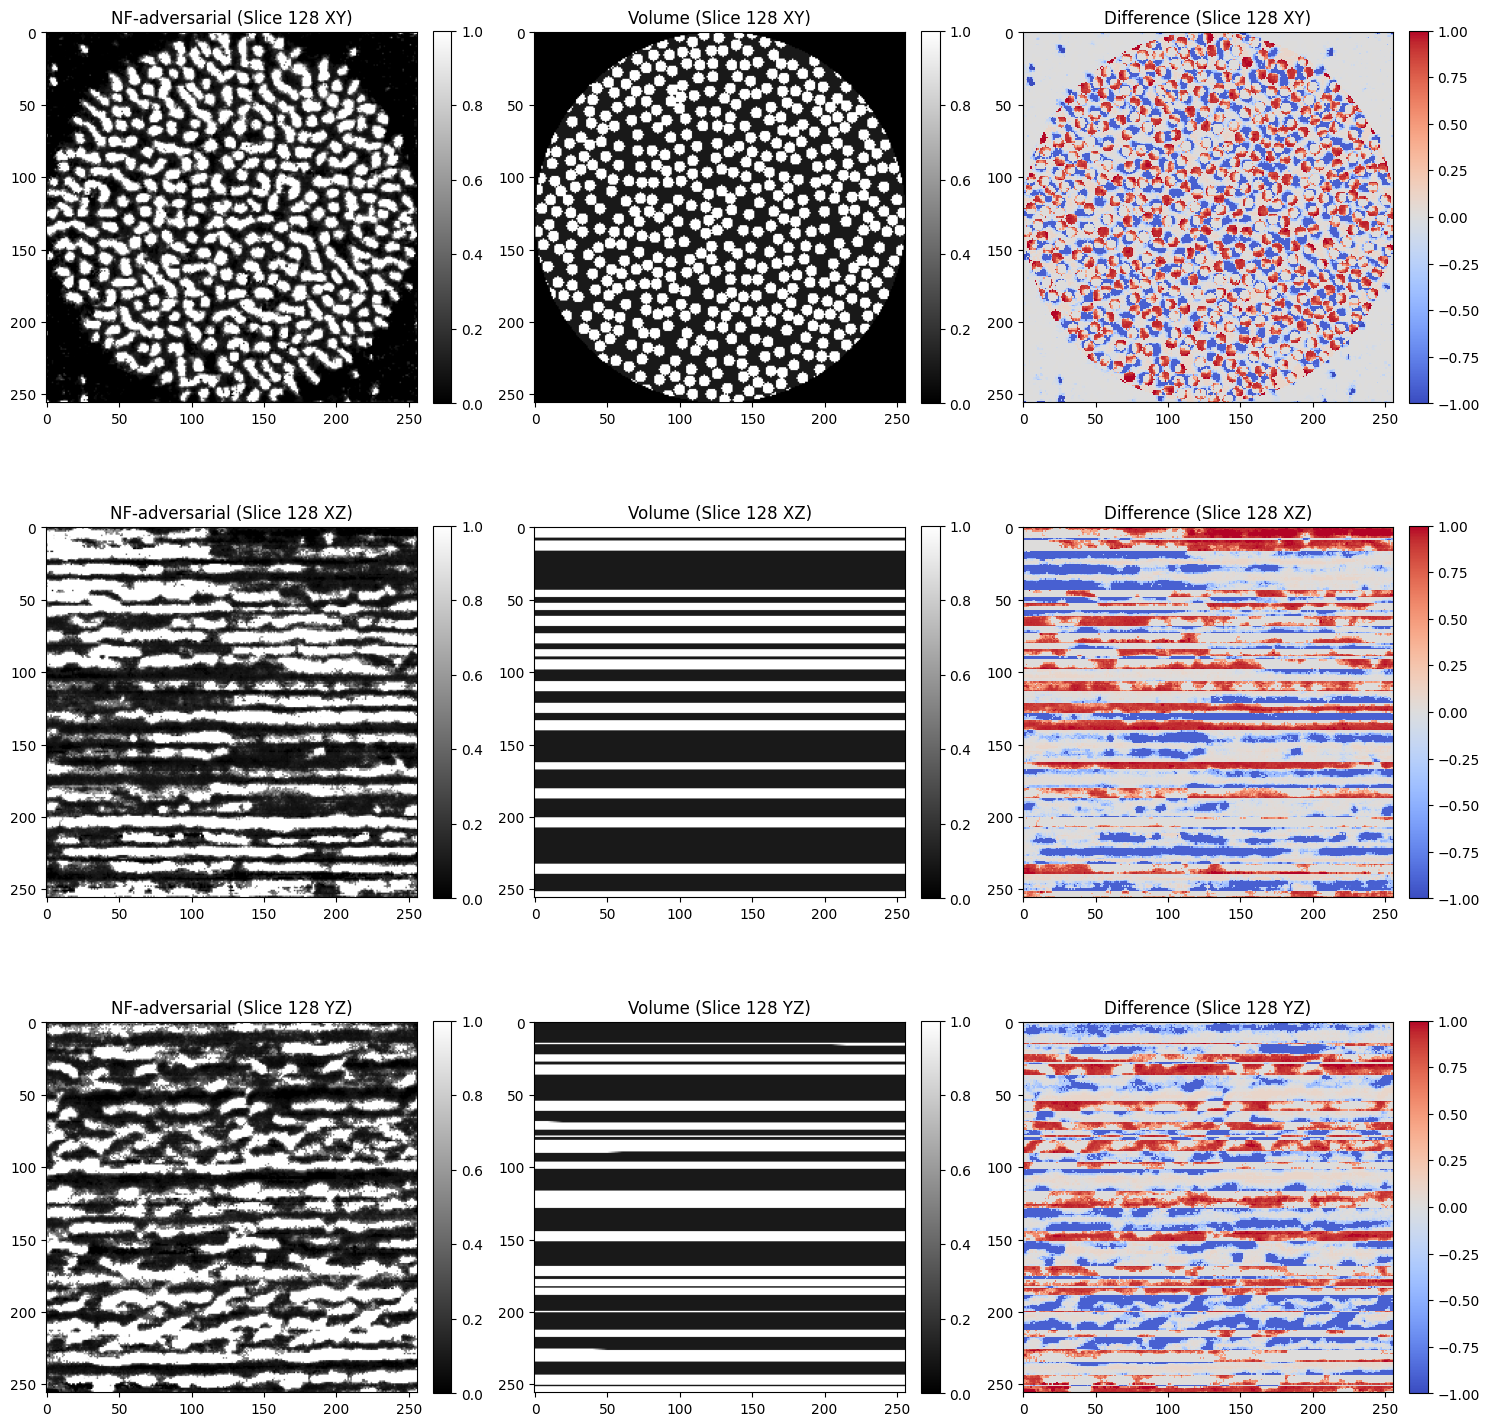

In [204]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Define a function to add colorbars
def add_colorbar(im, ax, clim):
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    im.set_clim(clim)

# Define subtitles for each plot
subtitles = [
    "NF-adversarial (Slice 128 XY)", "Volume (Slice 128 XY)", "Difference (Slice 128 XY)",
    "NF-adversarial (Slice 128 XZ)", "Volume (Slice 128 XZ)", "Difference (Slice 128 XZ)",
    "NF-adversarial (Slice 128 YZ)", "Volume (Slice 128 YZ)", "Difference (Slice 128 YZ)"
]

# Plot and add colorbars and subtitles
im = axs[0,0].imshow(outputs_temp[:,:,128],cmap="gray")
add_colorbar(im, axs[0, 0], (0, 1))
axs[0, 0].set_title(subtitles[0])

im = axs[0,1].imshow(vol_temp[:,:,128],cmap="gray")
add_colorbar(im, axs[0, 1], (0, 1))
axs[0, 1].set_title(subtitles[1])

im = axs[0,2].imshow(vol_temp[:,:,128] - outputs_temp[:,:,128],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[0, 2], (-1, 1))
axs[0, 2].set_title(subtitles[2])

im = axs[1,0].imshow(outputs_temp[:,128,:],cmap="gray")
add_colorbar(im, axs[1, 0], (0, 1))
axs[1, 0].set_title(subtitles[3])

im = axs[1,1].imshow(vol_temp[:,128,:],cmap="gray")
add_colorbar(im, axs[1, 1], (0, 1))
axs[1, 1].set_title(subtitles[4])

im = axs[1,2].imshow(vol_temp[:,128,:] - outputs_temp[:,128,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[1, 2], (-1, 1))
axs[1, 2].set_title(subtitles[5])

im = axs[2,0].imshow(outputs_temp[128,:,:],cmap="gray")
add_colorbar(im, axs[2, 0], (0, 1))
axs[2, 0].set_title(subtitles[6])

im = axs[2,1].imshow(vol_temp[128,:,:],cmap="gray")
add_colorbar(im, axs[2, 1], (0, 1))
axs[2, 1].set_title(subtitles[7])

im = axs[2,2].imshow(vol_temp[128,:,:] - outputs_temp[128,:,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[2, 2], (-1, 1))
axs[2, 2].set_title(subtitles[8])

plt.tight_layout()
plt.show()

In [ ]:
outputs = torch.from_numpy(outputs)
vol = torch.from_numpy(vol)

In [215]:
from torchmetrics.image import StructuralSimilarityIndexMeasure
from torchmetrics.image import PeakSignalNoiseRatio

psnr = PeakSignalNoiseRatio()
ssim = StructuralSimilarityIndexMeasure(data_range=1.0)
mse = torch.nn.MSELoss()

mse_vol = mse(outputs, vol)
psnr_vol = psnr(outputs, vol)
ssim_vol = ssim(outputs.unsqueeze(dim=0).unsqueeze(dim=0), vol.unsqueeze(dim=0).unsqueeze(dim=0))

In [216]:
mse_vol

tensor(0.2492, dtype=torch.float64)

In [217]:
psnr_vol

tensor(6.0343, dtype=torch.float64)

In [218]:
ssim_vol

tensor(0.1762)

In [205]:
qim3d.viz.vol(outputs)

Output()

In [206]:
qim3d.viz.vol(vol)

Output()

In [10]:
args_dict = {
    "general": {
        "experiment_name": "test",
        "data_path":f'synthetic_fibers/test_fiber_16_projections_0',
        "seed":42,
        "checkpoint_path":"raygan_fiber0_hashgrid_relu_regularization-weight-0.005_noise-level-None-2024-12-11-1543/epoch=21.ckpt",
        
    },
    "training": {
        "num_epochs": 1,
        "batch_size": 100,
        "model_lr":1e-4,
        "latent_lr":1e-4,
        "discriminator_lr":1e-4,
        "device":"cuda",
        "num_workers":0,
        "num_points":256,
        "imagefit_mode":False,
        "noisy_points":False,
        "regularization_weight":1e-1,
        "noise_level":0.03,
        "full_mode":False,
        "adversarial_mode":True,
    },
    "model": { 
        "model_type": "neuralfield",
        "num_hidden_layers": 4,
        "num_hidden_features": 256,
        "num_freq_bands": 6,
        "encoder":"hashgrid",
        "activation_function": 'relu',
        "latent_size": 32,
        "volume_sidelength": (256,256,256),
    },
}

In [11]:
projection_shape = np.load(f"{_PATH_DATA}/{args_dict['general']['data_path']}_projections.npy").shape
model = NeuralField(args_dict, 
            projection_shape=projection_shape,
           ).to(args_dict['training']['device'])

checkpoint_path = f"{_PATH_MODELS}/{args_dict['general']['checkpoint_path']}"
model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], strict=False)
model.eval();
model.cuda();

/tmp/ipykernel_909664/4243173417.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], stri

In [12]:
with h5py.File(f"{_PATH_DATA}/synthetic_fibers/test.hdf5", 'r') as f:
    vol = f["volumes"][int(args_dict['general']['data_path'].split("_")[-1]),:,:,:].transpose(2,1,0)
    
img = np.zeros((256,256,256))

mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, img.shape[0]), torch.linspace(-1, 1, img.shape[1]), torch.linspace(-1, 1, img.shape[1]), indexing='ij'),dim=-1)
outputs = torch.zeros_like(torch.tensor(img),dtype=torch.float)
for i in tqdm(range(mgrid.shape[0])):
    with torch.no_grad():
        outputs[i] = model(mgrid[i].view(-1,3).cuda()).view(outputs[i].shape)


print(outputs.min())
print(outputs.max())

outputs = outputs.numpy()

  0%|          | 0/256 [00:00<?, ?it/s]

tensor(0.)
tensor(0.7964)


In [13]:
vol_temp = np.flipud(np.rot90(vol,axes=(0,2)))
outputs_temp = np.flipud(np.rot90(outputs,axes=(0,2)))

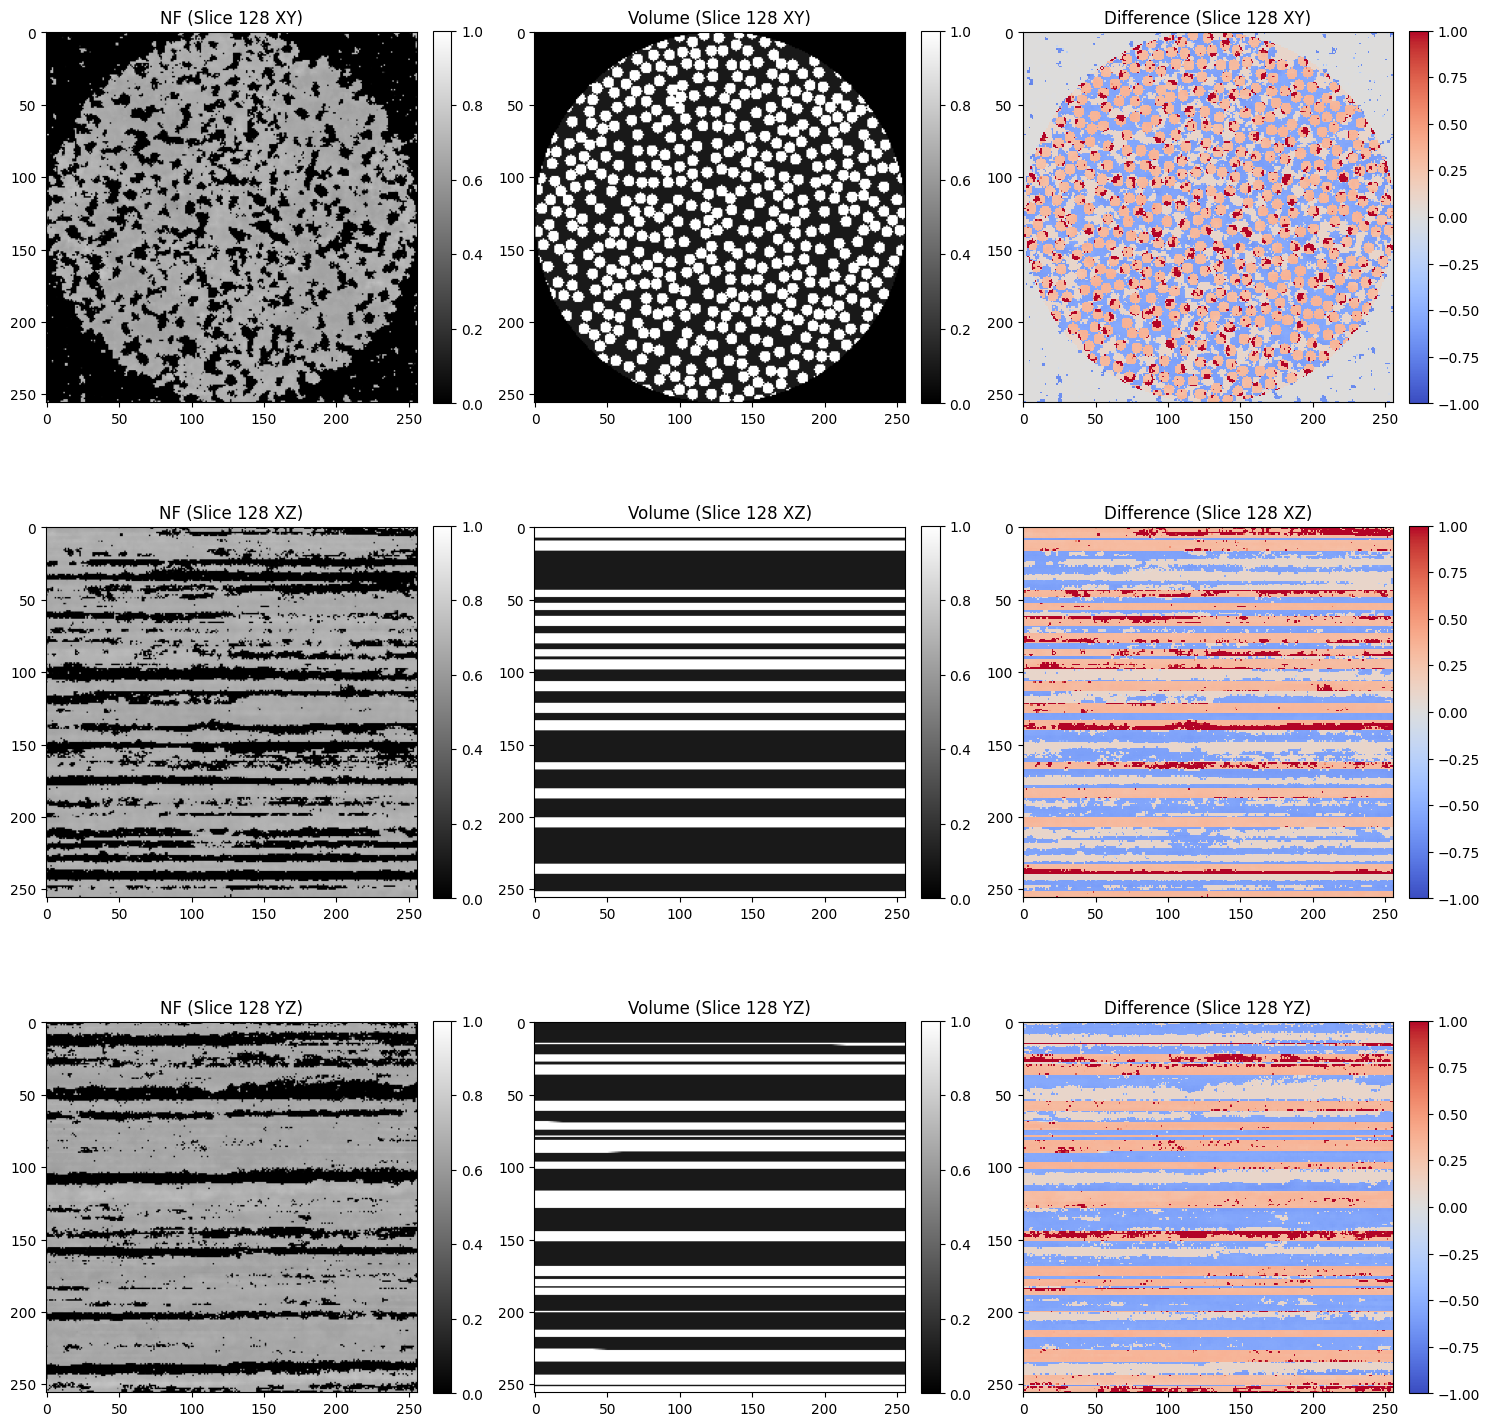

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Define a function to add colorbars
def add_colorbar(im, ax, clim):
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    im.set_clim(clim)

# Define subtitles for each plot
subtitles = [
    "NF (Slice 128 XY)", "Volume (Slice 128 XY)", "Difference (Slice 128 XY)",
    "NF (Slice 128 XZ)", "Volume (Slice 128 XZ)", "Difference (Slice 128 XZ)",
    "NF (Slice 128 YZ)", "Volume (Slice 128 YZ)", "Difference (Slice 128 YZ)"
]

# Plot and add colorbars and subtitles
im = axs[0,0].imshow(outputs_temp[:,:,128],cmap="gray")
add_colorbar(im, axs[0, 0], (0, 1))
axs[0, 0].set_title(subtitles[0])

im = axs[0,1].imshow(vol_temp[:,:,128],cmap="gray")
add_colorbar(im, axs[0, 1], (0, 1))
axs[0, 1].set_title(subtitles[1])

im = axs[0,2].imshow(vol_temp[:,:,128] - outputs_temp[:,:,128],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[0, 2], (-1, 1))
axs[0, 2].set_title(subtitles[2])

im = axs[1,0].imshow(outputs_temp[:,128,:],cmap="gray")
add_colorbar(im, axs[1, 0], (0, 1))
axs[1, 0].set_title(subtitles[3])

im = axs[1,1].imshow(vol_temp[:,128,:],cmap="gray")
add_colorbar(im, axs[1, 1], (0, 1))
axs[1, 1].set_title(subtitles[4])

im = axs[1,2].imshow(vol_temp[:,128,:] - outputs_temp[:,128,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[1, 2], (-1, 1))
axs[1, 2].set_title(subtitles[5])

im = axs[2,0].imshow(outputs_temp[128,:,:],cmap="gray")
add_colorbar(im, axs[2, 0], (0, 1))
axs[2, 0].set_title(subtitles[6])

im = axs[2,1].imshow(vol_temp[128,:,:],cmap="gray")
add_colorbar(im, axs[2, 1], (0, 1))
axs[2, 1].set_title(subtitles[7])

im = axs[2,2].imshow(vol_temp[128,:,:] - outputs_temp[128,:,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[2, 2], (-1, 1))
axs[2, 2].set_title(subtitles[8])

plt.tight_layout()
plt.show()

In [51]:
qim3d.viz.vol(outputs)

Output()

# Testing single volume reconstruction bugs

In [2]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import scipy.ndimage as ndi
import h5py
import qim3d

import torch
import torch._dynamo

from src.dataloaders import CTDataModule
from src.models.mlp import compute_projection_values, NeuralField
from src.models.nfraygan import RayGAN, NeuralGAN
from src import get_device, _PATH_DATA, _PATH_MODELS
import matplotlib.pyplot as plt
# %matplotlib widget

In [3]:
args_dict = {
    "general": {
        "experiment_name": "test",
        "data_path":f'bugnist_256/SL_0',
        "seed":42,
        "checkpoint_path":"NeuralField_SL0_hashgrid_relu_regularization-weight-0.005_noise-level-None_latent-size-256-2025-01-14-1606/last.ckpt",
        
    },
    "training": {
        "num_epochs": 1,
        "batch_size": 100,
        "model_lr":1e-4,
        "latent_lr":1e-4,
        "discriminator_lr":1e-4,
        "device":"cuda",
        "num_workers":0,
        "num_points":256,
        "imagefit_mode":False,
        "noisy_points":False,
        "regularization_weight":1e-1,
        "noise_level":0.03,
        "full_mode":False,
        "adversarial_mode":True,
    },
    "model": { 
        "model_type": "neuralfield",
        "num_hidden_layers": 4,
        "num_hidden_features": 256,
        "num_freq_bands": 6,
        "encoder":"hashgrid",
        "activation_function": 'relu',
        "latent_size": 32,
        "volume_sidelength": (256,256,256),
    },
}

In [4]:
projection_shape = np.load(f"{_PATH_DATA}/{args_dict['general']['data_path']}_projections.npy").shape
model = NeuralField(args_dict, 
            projection_shape=projection_shape,
           ).to(args_dict['training']['device'])

checkpoint_path = f"{_PATH_MODELS}/{args_dict['general']['checkpoint_path']}"
model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], strict=False)
model.eval();
model.cuda();

/tmp/ipykernel_1809569/4243173417.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], str

In [32]:
with h5py.File(f"{_PATH_DATA}/bugnist_256/SL_cubed.hdf5", 'r') as f:
    vol = f["volumes"][0,:,:,:]
    


mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, vol.shape[0]), torch.linspace(-1, 1, vol.shape[1]), torch.linspace(-1, 1, vol.shape[2]), indexing='ij'),dim=-1)
outputs = torch.zeros_like(torch.tensor(vol),dtype=torch.float)
for i in tqdm(range(mgrid.shape[0])):
    with torch.no_grad():
        outputs[i] = model(mgrid[i].view(-1,3).cuda()).view(outputs[i].shape)


print(outputs.min())
print(outputs.max())

outputs = outputs.numpy()

  0%|          | 0/192 [00:00<?, ?it/s]

tensor(8.9930e-07)
tensor(0.7589)


In [65]:
vol_temp = vol.transpose(2,1,0) #np.flipud(np.rot90(vol,axes=(0,2)))
outputs_temp = outputs #np.flipud(np.rot90(outputs,axes=(0,2)))
temp = np.zeros_like(vol_temp)
temp[:,:,16:176] = outputs_temp[16:176,:,:]
outputs_temp = temp

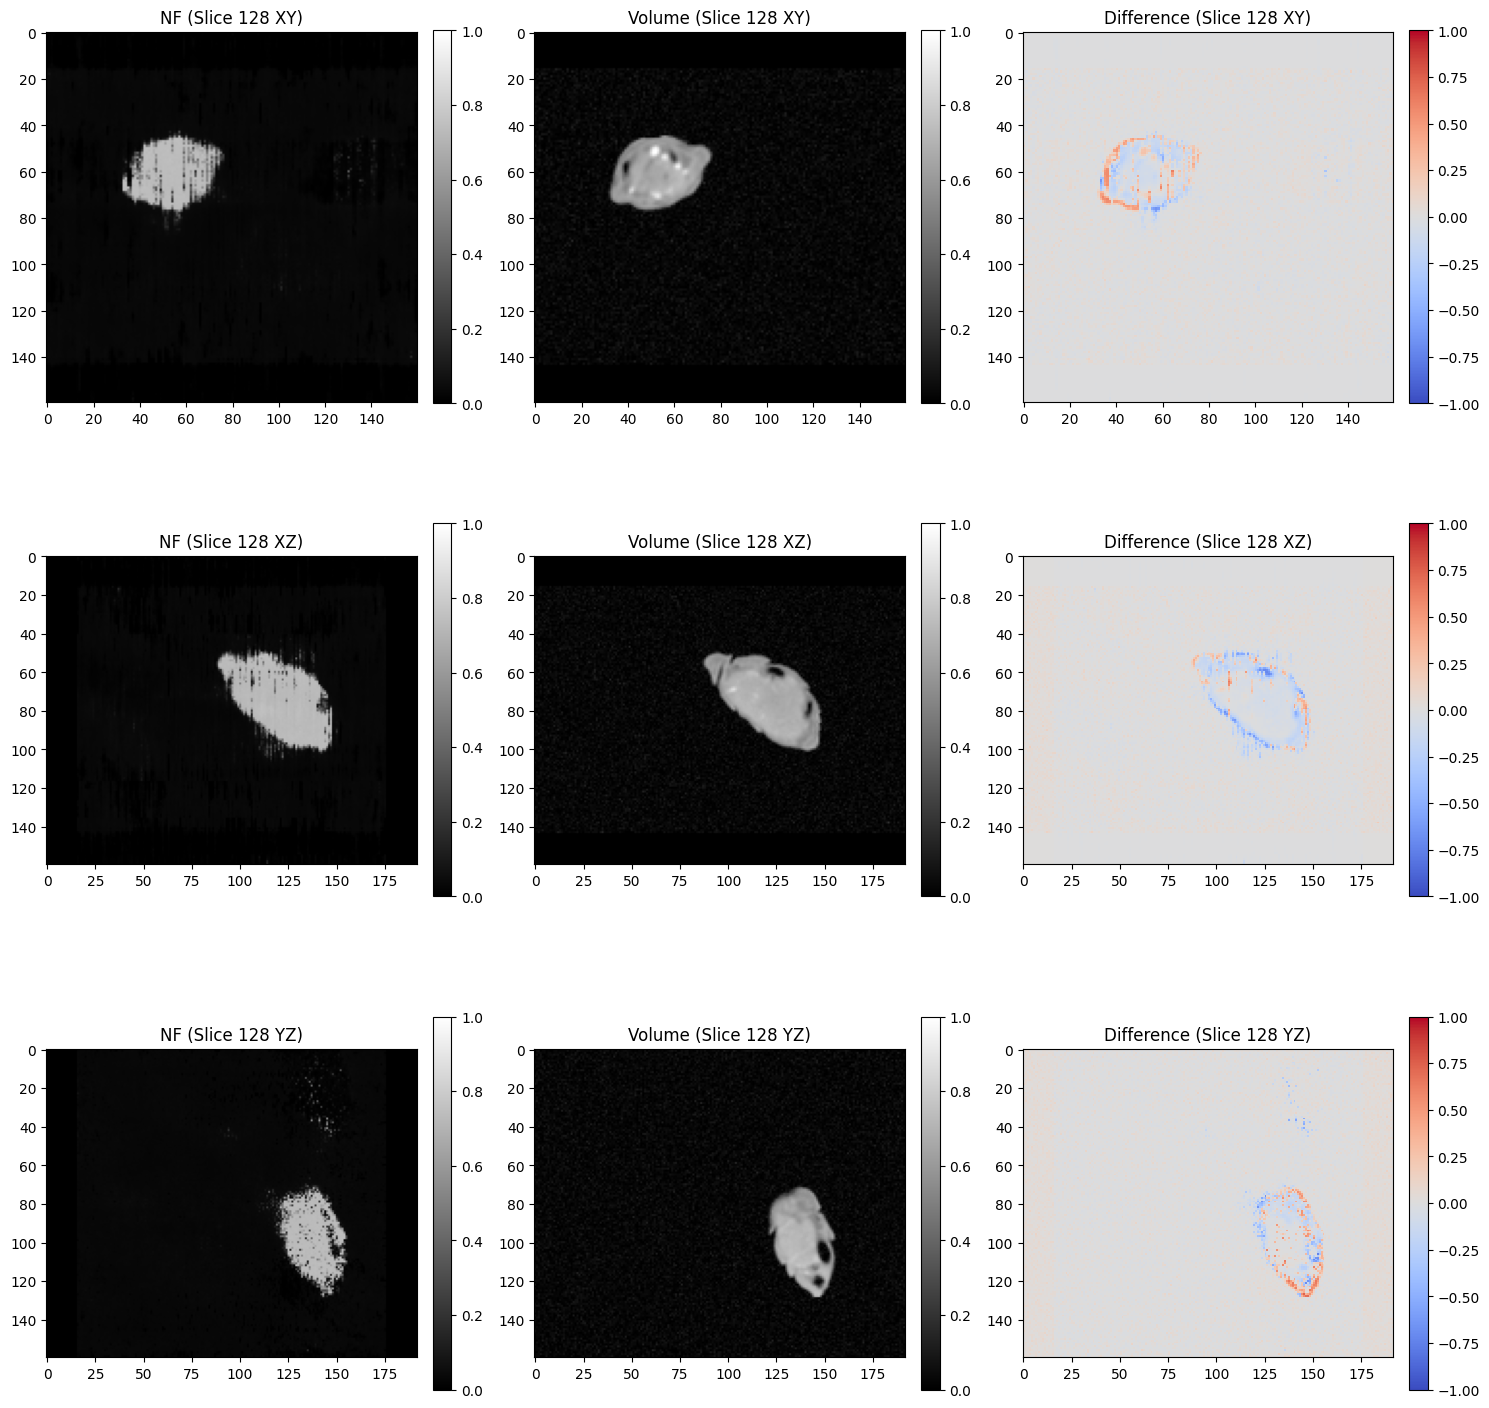

In [66]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Define a function to add colorbars
def add_colorbar(im, ax, clim):
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    im.set_clim(clim)

# Define subtitles for each plot
subtitles = [
    "NF (Slice 128 XY)", "Volume (Slice 128 XY)", "Difference (Slice 128 XY)",
    "NF (Slice 128 XZ)", "Volume (Slice 128 XZ)", "Difference (Slice 128 XZ)",
    "NF (Slice 128 YZ)", "Volume (Slice 128 YZ)", "Difference (Slice 128 YZ)"
]

# Plot and add colorbars and subtitles
im = axs[0,0].imshow(outputs_temp[:,:,80],cmap="gray")
add_colorbar(im, axs[0, 0], (0, 1))
axs[0, 0].set_title(subtitles[0])

im = axs[0,1].imshow(vol_temp[:,:,80],cmap="gray")
add_colorbar(im, axs[0, 1], (0, 1))
axs[0, 1].set_title(subtitles[1])

im = axs[0,2].imshow(vol_temp[:,:,80] - outputs_temp[:,:,80],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[0, 2], (-1, 1))
axs[0, 2].set_title(subtitles[2])

im = axs[1,0].imshow(outputs_temp[:,80,:],cmap="gray")
add_colorbar(im, axs[1, 0], (0, 1))
axs[1, 0].set_title(subtitles[3])

im = axs[1,1].imshow(vol_temp[:,80,:],cmap="gray")
add_colorbar(im, axs[1, 1], (0, 1))
axs[1, 1].set_title(subtitles[4])

im = axs[1,2].imshow(vol_temp[:,80,:] - outputs_temp[:,80,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[1, 2], (-1, 1))
axs[1, 2].set_title(subtitles[5])

im = axs[2,0].imshow(outputs_temp[96,:,:],cmap="gray")
add_colorbar(im, axs[2, 0], (0, 1))
axs[2, 0].set_title(subtitles[6])

im = axs[2,1].imshow(vol_temp[96,:,:],cmap="gray")
add_colorbar(im, axs[2, 1], (0, 1))
axs[2, 1].set_title(subtitles[7])

im = axs[2,2].imshow(vol_temp[96,:,:] - outputs_temp[96,:,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[2, 2], (-1, 1))
axs[2, 2].set_title(subtitles[8])

plt.tight_layout()
plt.show()

In [54]:
qim3d.viz.vol(outputs_temp)

Output()

In [9]:
args_dict = {
    "general": {
        "experiment_name": "test",
        "data_path":f'bugnist_256/SL_cubed_clean/soldat_5_012',
        "seed":42,
        "checkpoint_path":"raygan_SL0_hashgrid_relu_regularization-weight-0.005_noise-level-None-2024-12-17-0831/epoch=199.ckpt",
        
    },
    "training": {
        "num_epochs": 1,
        "batch_size": 100,
        "model_lr":1e-4,
        "latent_lr":1e-4,
        "discriminator_lr":1e-4,
        "device":"cuda",
        "num_workers":0,
        "num_points":256,
        "imagefit_mode":False,
        "noisy_points":False,
        "regularization_weight":1e-1,
        "noise_level":0.03,
        "full_mode":False,
        "adversarial_mode":True,
    },
    "model": { 
        "model_type": "neuralfield",
        "num_hidden_layers": 4,
        "num_hidden_features": 256,
        "num_freq_bands": 6,
        "encoder":"hashgrid",
        "activation_function": 'relu',
        "latent_size": 32,
        "volume_sidelength": (256,256,256),
    },
}

In [10]:
projection_shape = np.load(f"{_PATH_DATA}/{args_dict['general']['data_path']}_projections.npy").shape
model = RayGAN(args_dict, 
            projection_shape=projection_shape,
           ).to(args_dict['training']['device'])

checkpoint_path = f"{_PATH_MODELS}/{args_dict['general']['checkpoint_path']}"
model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], strict=False)
model.eval();
model.cuda();

/tmp/ipykernel_2904929/3298638933.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], str

In [11]:
vol = qim3d.io.load(f"{_PATH_DATA}/{args_dict['general']['data_path']}.tif").transpose(2,1,0)
vol -= vol.min()
vol = vol/vol.max()
    
img = np.zeros((256,256,256))

mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, img.shape[0]), torch.linspace(-1, 1, img.shape[1]), torch.linspace(-1, 1, img.shape[1]), indexing='ij'),dim=-1)
outputs = torch.zeros_like(torch.tensor(img),dtype=torch.float)
for i in tqdm(range(mgrid.shape[0])):
    with torch.no_grad():
        outputs[i] = model(mgrid[i].view(-1,3).cuda()).view(outputs[i].shape)


print(outputs.min())
print(outputs.max())

outputs = outputs.numpy()

Loading:   0%|          | 0.00B/16.0MB  [00:00<?, ?B/s]

Loaded shape: (256, 256, 256)
Volume using 16.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 24.2 GB (3.2%)
 • Free..: 730.8 GB (96.8%)


  0%|          | 0/256 [00:00<?, ?it/s]

tensor(5.3115e-34)
tensor(0.8774)


In [12]:
vol_temp = np.flipud(np.rot90(vol,axes=(0,2)))
outputs_temp = np.flipud(np.rot90(outputs,axes=(0,2)))

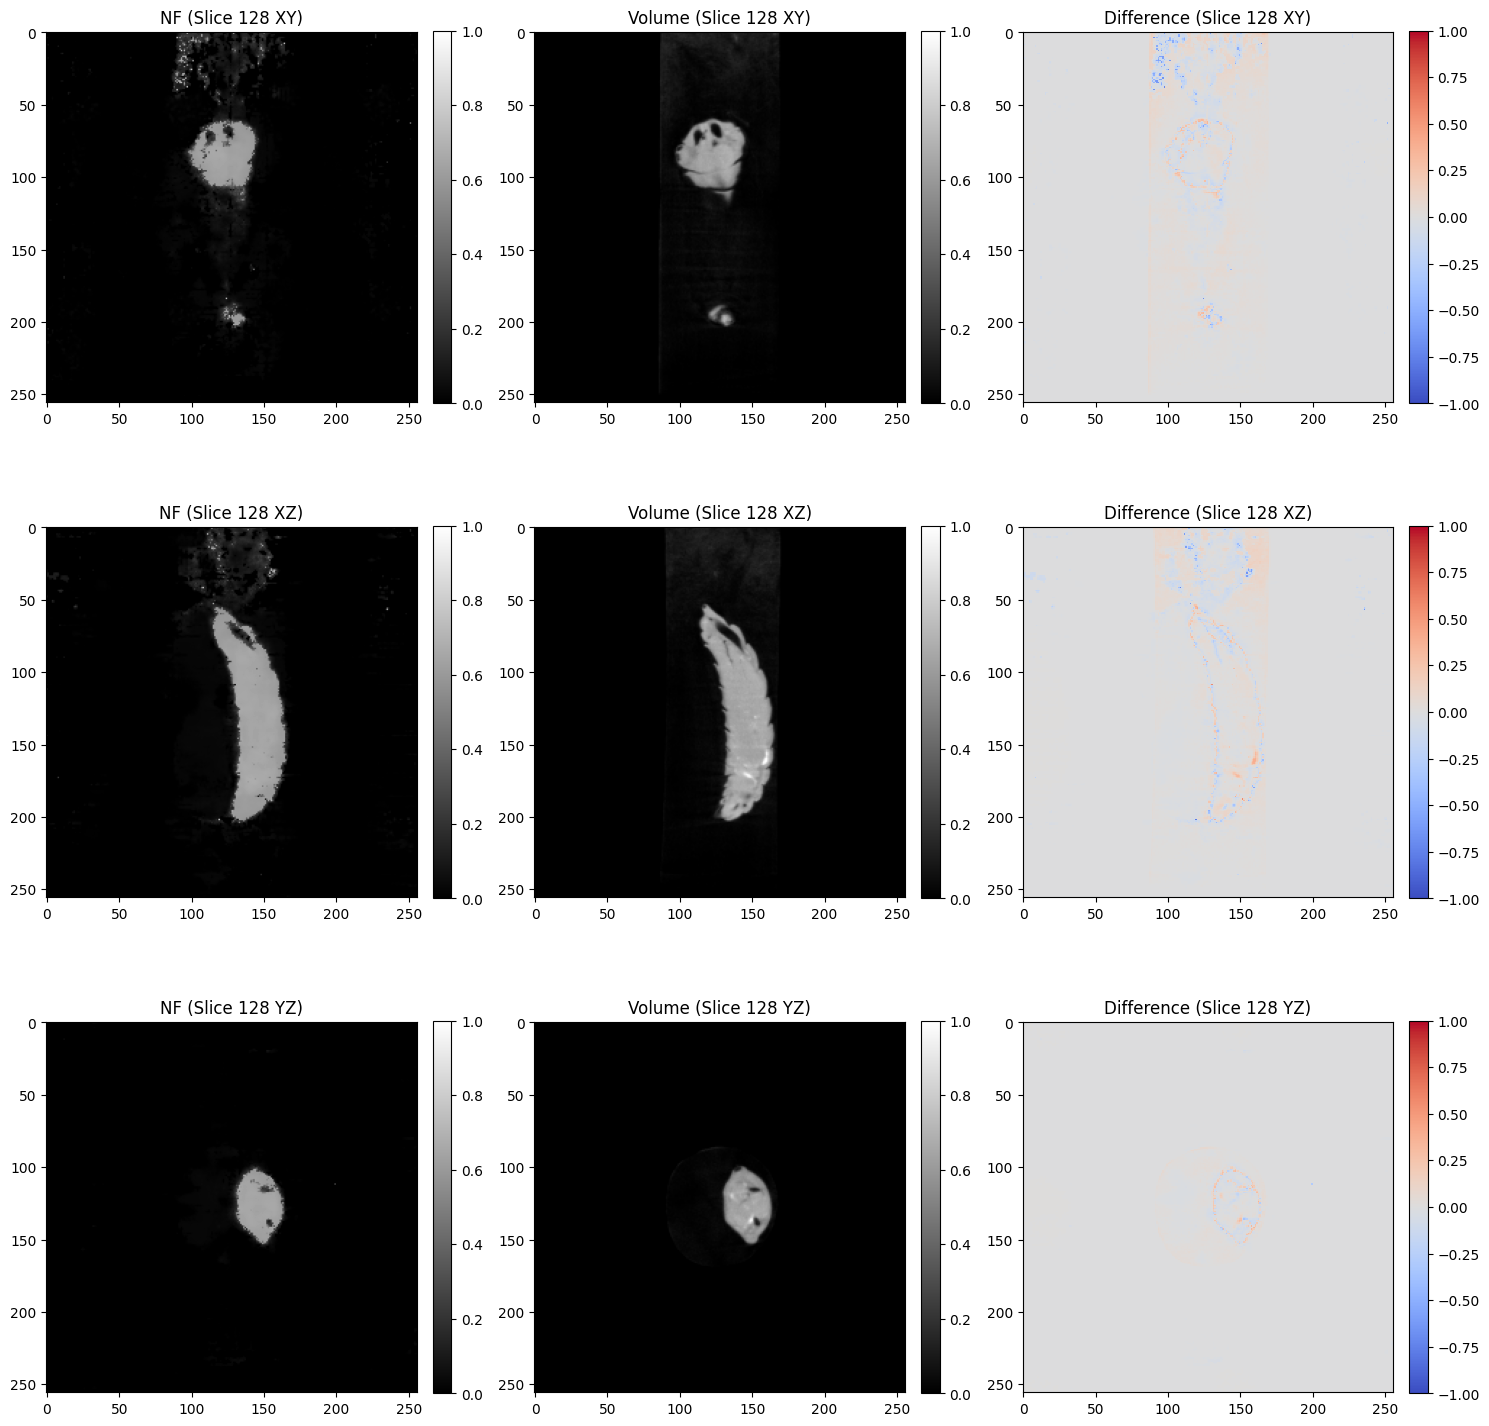

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Define a function to add colorbars
def add_colorbar(im, ax, clim):
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    im.set_clim(clim)

# Define subtitles for each plot
subtitles = [
    "NF (Slice 128 XY)", "Volume (Slice 128 XY)", "Difference (Slice 128 XY)",
    "NF (Slice 128 XZ)", "Volume (Slice 128 XZ)", "Difference (Slice 128 XZ)",
    "NF (Slice 128 YZ)", "Volume (Slice 128 YZ)", "Difference (Slice 128 YZ)"
]

# Plot and add colorbars and subtitles
im = axs[0,0].imshow(outputs_temp[:,:,128],cmap="gray")
add_colorbar(im, axs[0, 0], (0, 1))
axs[0, 0].set_title(subtitles[0])

im = axs[0,1].imshow(vol_temp[:,:,128],cmap="gray")
add_colorbar(im, axs[0, 1], (0, 1))
axs[0, 1].set_title(subtitles[1])

im = axs[0,2].imshow(vol_temp[:,:,128] - outputs_temp[:,:,128],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[0, 2], (-1, 1))
axs[0, 2].set_title(subtitles[2])

im = axs[1,0].imshow(outputs_temp[:,128,:],cmap="gray")
add_colorbar(im, axs[1, 0], (0, 1))
axs[1, 0].set_title(subtitles[3])

im = axs[1,1].imshow(vol_temp[:,128,:],cmap="gray")
add_colorbar(im, axs[1, 1], (0, 1))
axs[1, 1].set_title(subtitles[4])

im = axs[1,2].imshow(vol_temp[:,128,:] - outputs_temp[:,128,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[1, 2], (-1, 1))
axs[1, 2].set_title(subtitles[5])

im = axs[2,0].imshow(outputs_temp[128,:,:],cmap="gray")
add_colorbar(im, axs[2, 0], (0, 1))
axs[2, 0].set_title(subtitles[6])

im = axs[2,1].imshow(vol_temp[128,:,:],cmap="gray")
add_colorbar(im, axs[2, 1], (0, 1))
axs[2, 1].set_title(subtitles[7])

im = axs[2,2].imshow(vol_temp[128,:,:] - outputs_temp[128,:,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[2, 2], (-1, 1))
axs[2, 2].set_title(subtitles[8])

plt.tight_layout()
plt.show()

In [14]:
qim3d.viz.vol(outputs)

Output()

# Testing Pancreas

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import scipy.ndimage as ndi
import h5py
import qim3d

import torch
import torch._dynamo

from src.dataloaders import CTDataModule
from src.models.mlp import compute_projection_values, NeuralField
from src.models.nfraygan import RayGAN, NeuralGAN
from src import get_device, _PATH_DATA, _PATH_MODELS
import matplotlib.pyplot as plt
# %matplotlib widget

In [2]:
args_dict = {
    "general": {
        "experiment_name": "test",
        "data_path":f'Task07_Pancreas/test_0',
        "seed":42,
        "checkpoint_path":"NeuralField_Pancreas0_hashgrid_relu_regularization-weight-0.0_noise-level-None_latent-size-256-2025-01-17-1322/epoch=99.ckpt",
        
    },
    "training": {
        "num_epochs": 1,
        "batch_size": 100,
        "model_lr":1e-4,
        "latent_lr":1e-4,
        "discriminator_lr":1e-4,
        "device":"cuda",
        "num_workers":0,
        "num_points":256,
        "imagefit_mode":False,
        "noisy_points":False,
        "regularization_weight":1e-1,
        "noise_level":0.03,
        "full_mode":False,
        "adversarial_mode":True,
    },
    "model": { 
        "model_type": "neuralfield",
        "num_hidden_layers": 4,
        "num_hidden_features": 256,
        "num_freq_bands": 6,
        "encoder":"hashgrid",
        "activation_function": 'relu',
        "latent_size": 32,
        "volume_sidelength": (256,256,256),
    },
}

In [3]:
projection_shape = np.load(f"{_PATH_DATA}/{args_dict['general']['data_path']}_projections.npy").shape
model = NeuralField(args_dict, 
            projection_shape=projection_shape,
           ).to(args_dict['training']['device'])

checkpoint_path = f"{_PATH_MODELS}/{args_dict['general']['checkpoint_path']}"
model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], strict=False)
model.eval();
model.cuda();

/tmp/ipykernel_1086869/4243173417.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], str

In [17]:
with h5py.File(f"{_PATH_DATA}/Task07_Pancreas/train.hdf5", 'r') as f:
    vol = torch.from_numpy(f["volumes"][25,:,:,:]).permute(1,2,0)

mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, vol.shape[0]), torch.linspace(-1, 1, vol.shape[1]), torch.linspace(-1, 1, vol.shape[2]), indexing='ij'),dim=-1)
outputs = torch.zeros_like(torch.tensor(vol),dtype=torch.float)
for i in tqdm(range(mgrid.shape[0])):
    with torch.no_grad():
        outputs[i] = model(mgrid[i].view(-1,3).cuda()).view(outputs[i].shape)


print(outputs.min())
print(outputs.max())

outputs = outputs.numpy()

/tmp/ipykernel_1086869/1116650421.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = torch.zeros_like(torch.tensor(vol),dtype=torch.float)


  0%|          | 0/512 [00:00<?, ?it/s]

tensor(9.9131e-31)
tensor(0.9996)


In [18]:
vol_temp = vol #np.flipud(np.rot90(vol,axes=(0,2)))
outputs_temp = outputs #np.flipud(np.rot90(outputs,axes=(0,2)))

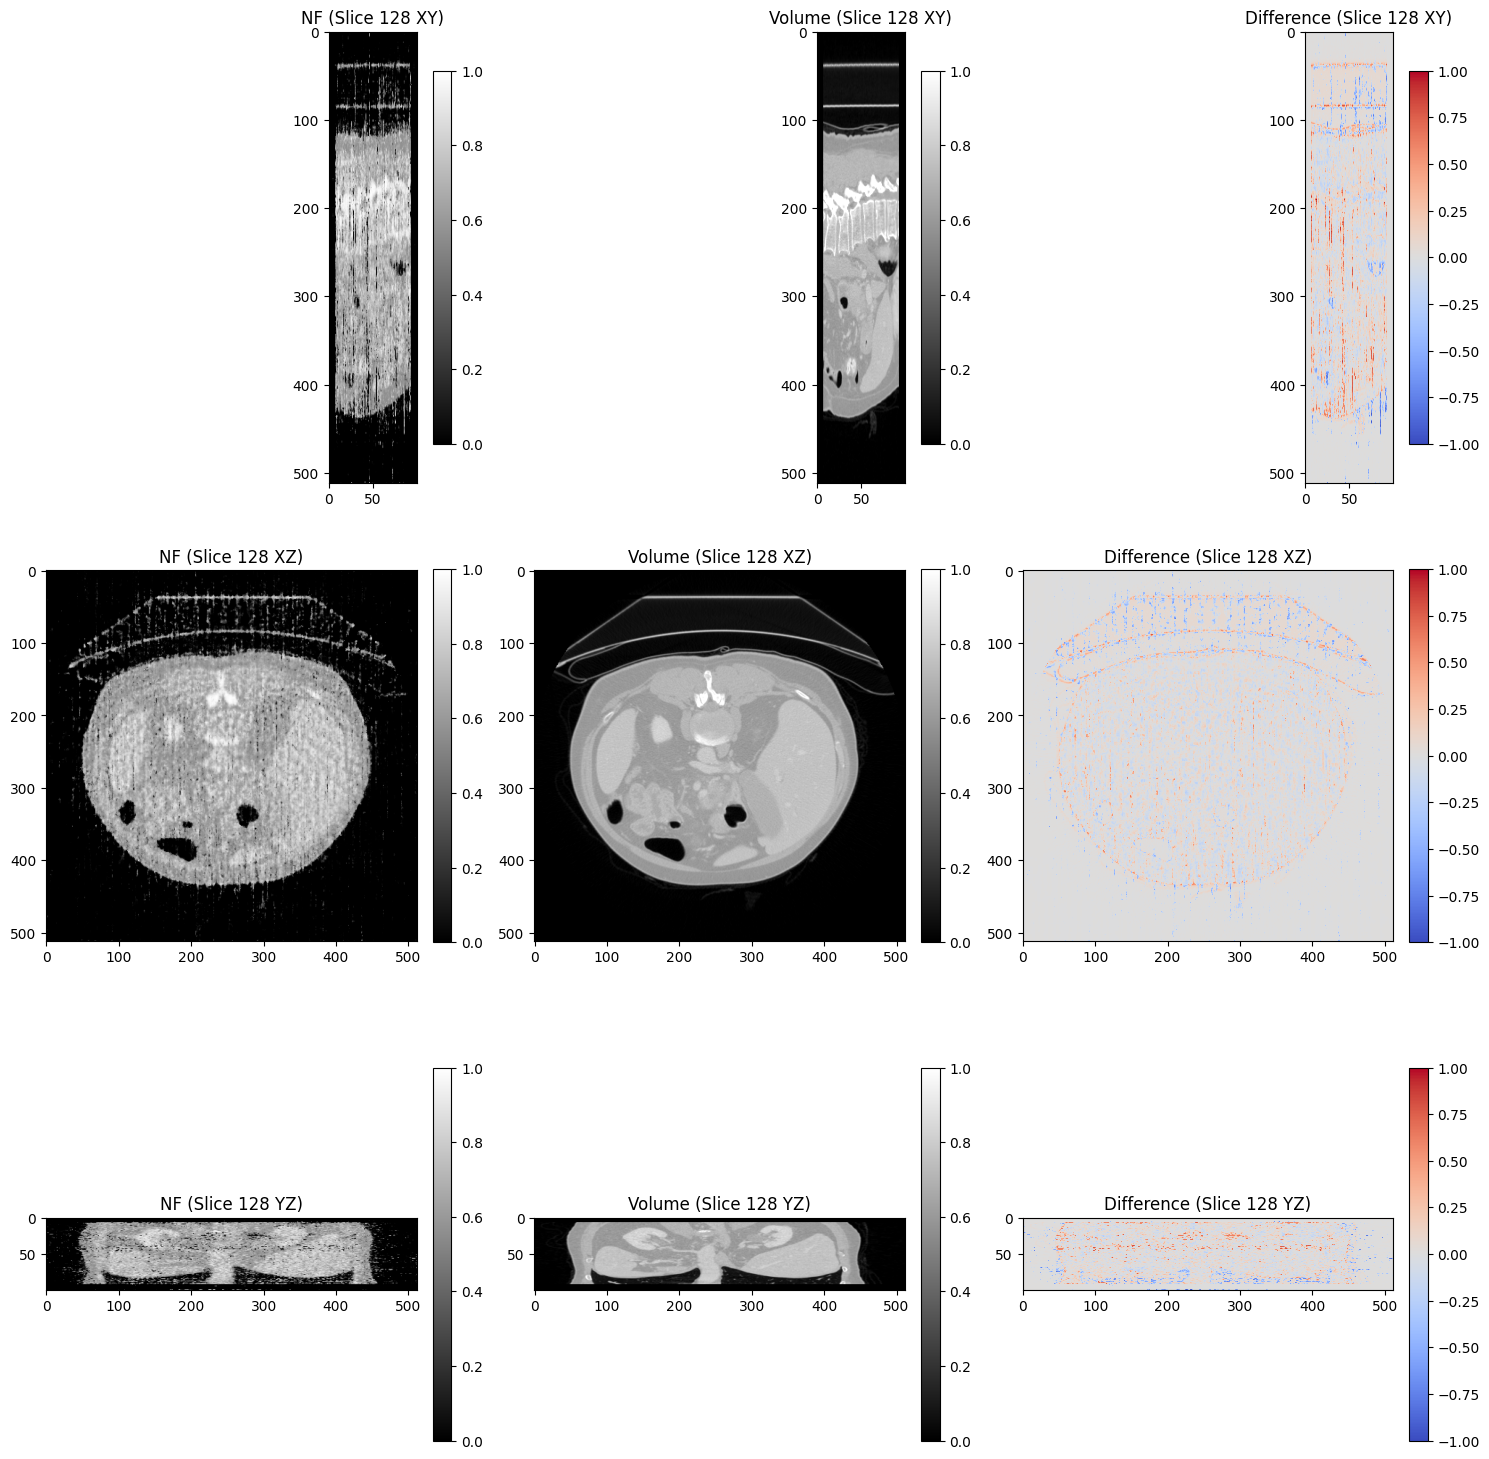

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Define a function to add colorbars
def add_colorbar(im, ax, clim):
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    im.set_clim(clim)

# Define subtitles for each plot
subtitles = [
    "NF (Slice 128 XY)", "Volume (Slice 128 XY)", "Difference (Slice 128 XY)",
    "NF (Slice 128 XZ)", "Volume (Slice 128 XZ)", "Difference (Slice 128 XZ)",
    "NF (Slice 128 YZ)", "Volume (Slice 128 YZ)", "Difference (Slice 128 YZ)"
]

# Plot and add colorbars and subtitles
im = axs[0,0].imshow(outputs_temp[:,:,outputs_temp.shape[2]//2],cmap="gray")
add_colorbar(im, axs[0, 0], (0, 1))
axs[0, 0].set_title(subtitles[0])

im = axs[0,1].imshow(vol_temp[:,:,outputs_temp.shape[2]//2],cmap="gray")
add_colorbar(im, axs[0, 1], (0, 1))
axs[0, 1].set_title(subtitles[1])

im = axs[0,2].imshow(vol_temp[:,:,outputs_temp.shape[2]//2] - outputs_temp[:,:,outputs_temp.shape[2]//2],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[0, 2], (-1, 1))
axs[0, 2].set_title(subtitles[2])

im = axs[1,0].imshow(outputs_temp[:,outputs_temp.shape[1]//2,:],cmap="gray")
add_colorbar(im, axs[1, 0], (0, 1))
axs[1, 0].set_title(subtitles[3])

im = axs[1,1].imshow(vol_temp[:,outputs_temp.shape[1]//2,:],cmap="gray")
add_colorbar(im, axs[1, 1], (0, 1))
axs[1, 1].set_title(subtitles[4])

im = axs[1,2].imshow(vol_temp[:,outputs_temp.shape[1]//2,:] - outputs_temp[:,outputs_temp.shape[1]//2,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[1, 2], (-1, 1))
axs[1, 2].set_title(subtitles[5])

im = axs[2,0].imshow(outputs_temp[outputs_temp.shape[0]//2,:,:],cmap="gray")
add_colorbar(im, axs[2, 0], (0, 1))
axs[2, 0].set_title(subtitles[6])

im = axs[2,1].imshow(vol_temp[outputs_temp.shape[0]//2,:,:],cmap="gray")
add_colorbar(im, axs[2, 1], (0, 1))
axs[2, 1].set_title(subtitles[7])

im = axs[2,2].imshow(vol_temp[outputs_temp.shape[0]//2,:,:] - outputs_temp[outputs_temp.shape[0]//2,:,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[2, 2], (-1, 1))
axs[2, 2].set_title(subtitles[8])

plt.tight_layout()
plt.show()

# Testing 2d Pancreas

In [29]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import scipy.ndimage as ndi
import h5py
import qim3d

import torch
import torch._dynamo

from src.dataloaders import CTDataModule
from src.models.mlp import compute_projection_values, NeuralField
from src.models.nfraygan import RayGAN, NeuralGAN
from src import get_device, _PATH_DATA, _PATH_MODELS
import matplotlib.pyplot as plt
# %matplotlib widget

In [30]:
args_dict = {
    "general": {
        "experiment_name": "test",
        "data_path":f'Task07_Pancreas/test_0',
        "seed":42,
        "checkpoint_path":"NeuralField_Pancreas0_hashgrid_relu_regularization-weight-0.0005_noise-level-None_latent-size-256-2025-01-30-1947/last.ckpt",
        
    },
    "training": {
        "num_epochs": 1,
        "batch_size": 100,
        "model_lr":1e-4,
        "latent_lr":1e-4,
        "discriminator_lr":1e-4,
        "device":"cuda",
        "num_workers":0,
        "num_points":256,
        "imagefit_mode":False,
        "noisy_points":False,
        "regularization_weight":1e-1,
        "noise_level":0.03,
        "full_mode":False,
        "adversarial_mode":True,
    },
    "model": { 
        "model_type": "neuralfield",
        "num_hidden_layers": 4,
        "num_hidden_features": 256,
        "num_freq_bands": 6,
        "encoder":"hashgrid",
        "activation_function": 'relu',
        "latent_size": 32,
        "volume_sidelength": (256,256,256),
    },
}

In [31]:
projection_shape = np.load(f"{_PATH_DATA}/{args_dict['general']['data_path']}_projections.npy").shape
model = NeuralField(args_dict, 
            projection_shape=projection_shape,
           ).to(args_dict['training']['device'])

checkpoint_path = f"{_PATH_MODELS}/{args_dict['general']['checkpoint_path']}"
model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], strict=False)
model.eval();
model.cuda();

/tmp/ipykernel_2393011/4243173417.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], str

In [87]:
with h5py.File(f"{_PATH_DATA}/Task07_Pancreas/train.hdf5", 'r') as f:
    vol = torch.from_numpy(f["volumes"][100,:,:,:]).permute(1,2,0)[:,47:52,:]

mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, vol.shape[0]), torch.linspace(-0.6526, 0.6526, vol.shape[1]-1), torch.linspace(-1, 1, vol.shape[2]), indexing='ij'),dim=-1)
outputs = torch.zeros_like(torch.tensor(vol[:,:-1,:]),dtype=torch.float)
for i in tqdm(range(mgrid.shape[0])):
    with torch.no_grad():
        outputs[i] = model(mgrid[i].view(-1,3).cuda()).view(outputs[i].shape)


print(outputs.min())
print(outputs.max())

outputs = outputs.numpy()

/tmp/ipykernel_2393011/380387156.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = torch.zeros_like(torch.tensor(vol[:,:-1,:]),dtype=torch.float)


  0%|          | 0/512 [00:00<?, ?it/s]

tensor(1.0832e-06)
tensor(0.9704)


In [88]:
qim3d.viz.volumetric(outputs)

Output()

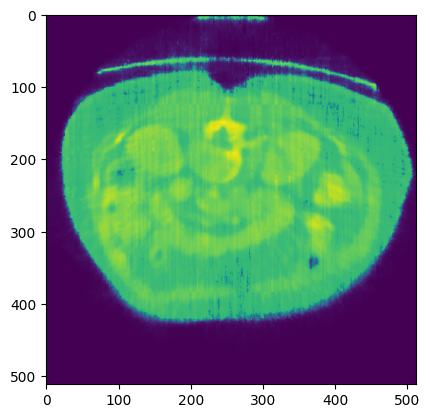

In [93]:
plt.imshow(outputs[:,0,:])

In [96]:
outputs.shape

(512, 4, 512)

In [35]:
qim3d.io.save("temp.tif",outputs,replace=True)

In [97]:
vol_temp = vol[:,:-1,:] #np.flipud(np.rot90(vol,axes=(0,2)))
outputs_temp = outputs #np.flipud(np.rot90(outputs,axes=(0,2)))

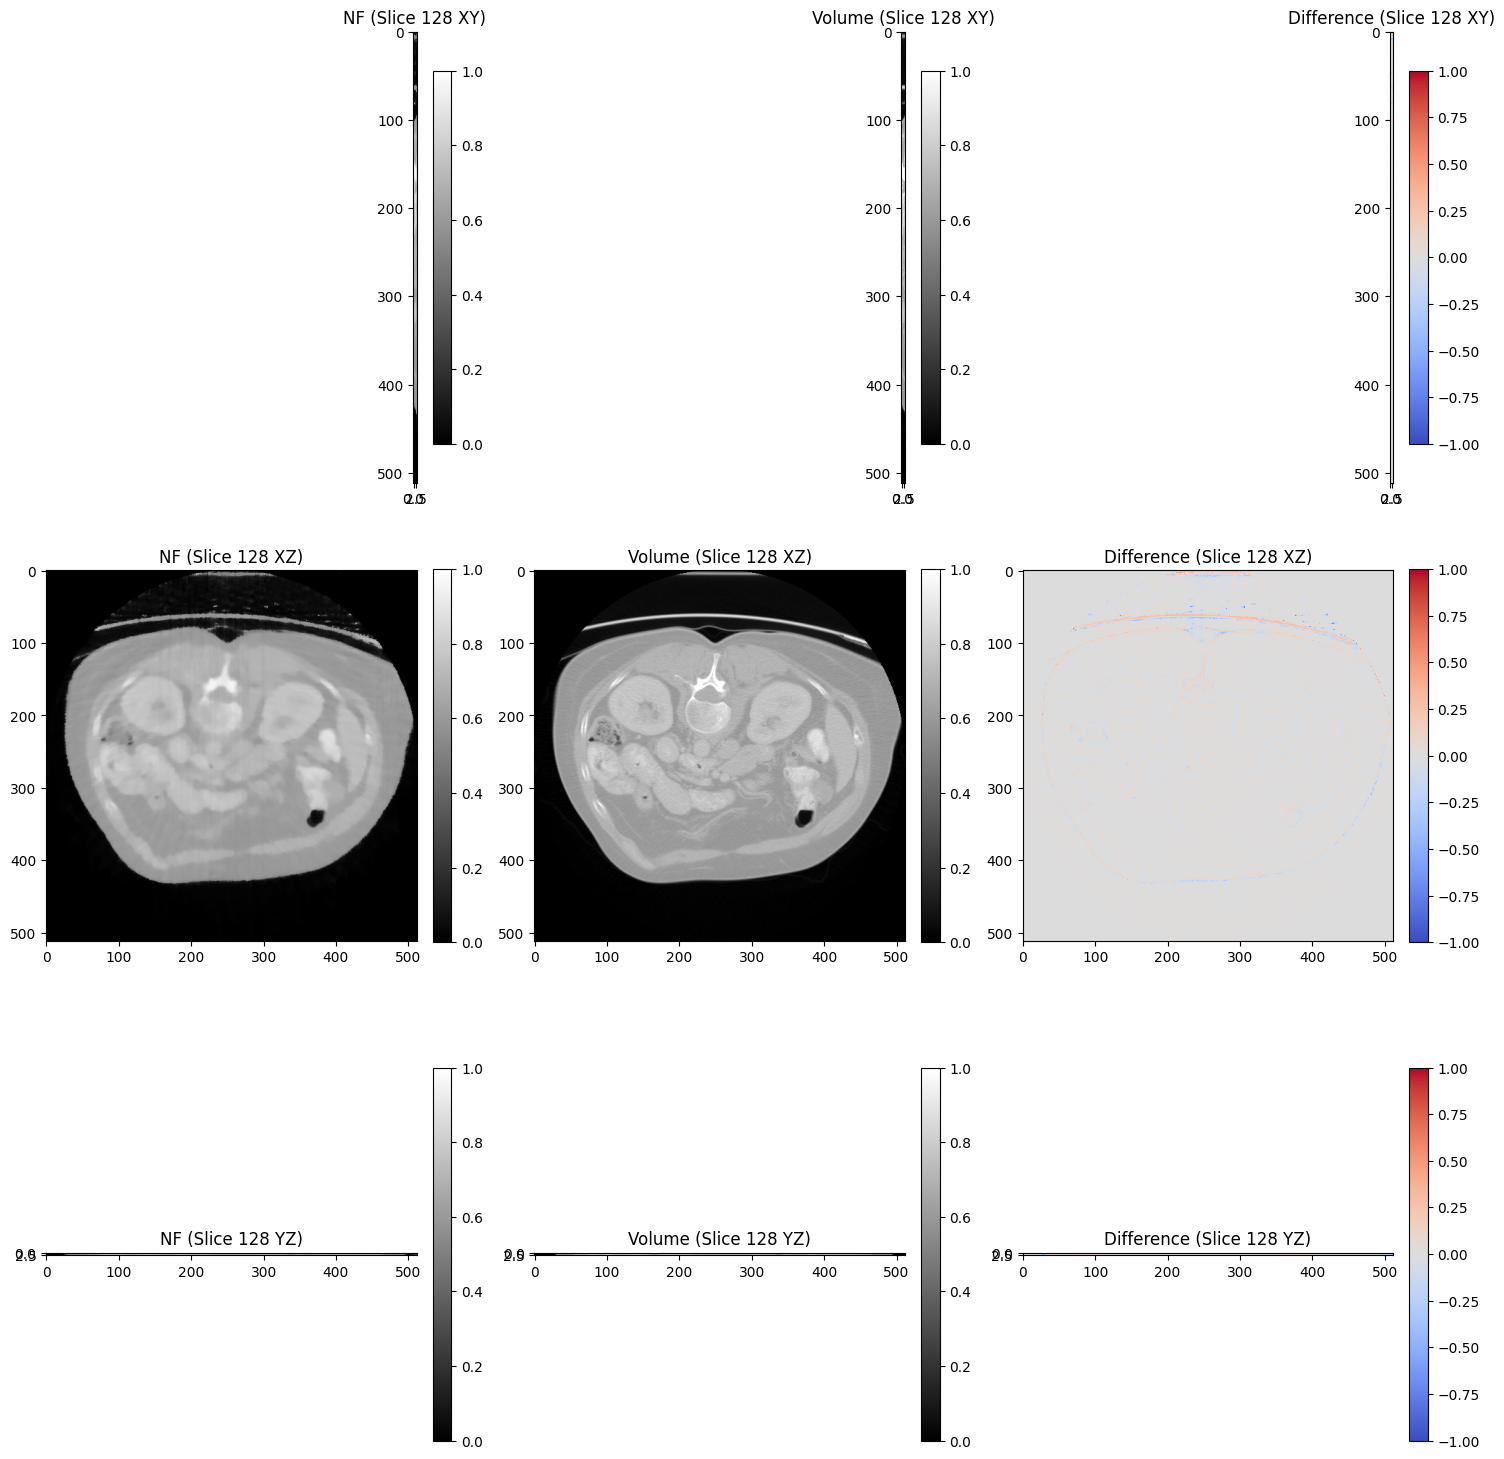

In [98]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Define a function to add colorbars
def add_colorbar(im, ax, clim):
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    im.set_clim(clim)

# Define subtitles for each plot
subtitles = [
    "NF (Slice 128 XY)", "Volume (Slice 128 XY)", "Difference (Slice 128 XY)",
    "NF (Slice 128 XZ)", "Volume (Slice 128 XZ)", "Difference (Slice 128 XZ)",
    "NF (Slice 128 YZ)", "Volume (Slice 128 YZ)", "Difference (Slice 128 YZ)"
]

# Plot and add colorbars and subtitles
im = axs[0,0].imshow(outputs_temp[:,:,outputs_temp.shape[2]//2],cmap="gray")
add_colorbar(im, axs[0, 0], (0, 1))
axs[0, 0].set_title(subtitles[0])

im = axs[0,1].imshow(vol_temp[:,:,outputs_temp.shape[2]//2],cmap="gray")
add_colorbar(im, axs[0, 1], (0, 1))
axs[0, 1].set_title(subtitles[1])

im = axs[0,2].imshow(vol_temp[:,:,outputs_temp.shape[2]//2] - outputs_temp[:,:,outputs_temp.shape[2]//2],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[0, 2], (-1, 1))
axs[0, 2].set_title(subtitles[2])

im = axs[1,0].imshow(outputs_temp[:,outputs_temp.shape[1]//2,:],cmap="gray")
add_colorbar(im, axs[1, 0], (0, 1))
axs[1, 0].set_title(subtitles[3])

im = axs[1,1].imshow(vol_temp[:,outputs_temp.shape[1]//2,:],cmap="gray")
add_colorbar(im, axs[1, 1], (0, 1))
axs[1, 1].set_title(subtitles[4])

im = axs[1,2].imshow(vol_temp[:,outputs_temp.shape[1]//2,:] - outputs_temp[:,outputs_temp.shape[1]//2,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[1, 2], (-1, 1))
axs[1, 2].set_title(subtitles[5])

im = axs[2,0].imshow(outputs_temp[outputs_temp.shape[0]//2,:,:],cmap="gray")
add_colorbar(im, axs[2, 0], (0, 1))
axs[2, 0].set_title(subtitles[6])

im = axs[2,1].imshow(vol_temp[outputs_temp.shape[0]//2,:,:],cmap="gray")
add_colorbar(im, axs[2, 1], (0, 1))
axs[2, 1].set_title(subtitles[7])

im = axs[2,2].imshow(vol_temp[outputs_temp.shape[0]//2,:,:] - outputs_temp[outputs_temp.shape[0]//2,:,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[2, 2], (-1, 1))
axs[2, 2].set_title(subtitles[8])

plt.tight_layout()
plt.show()

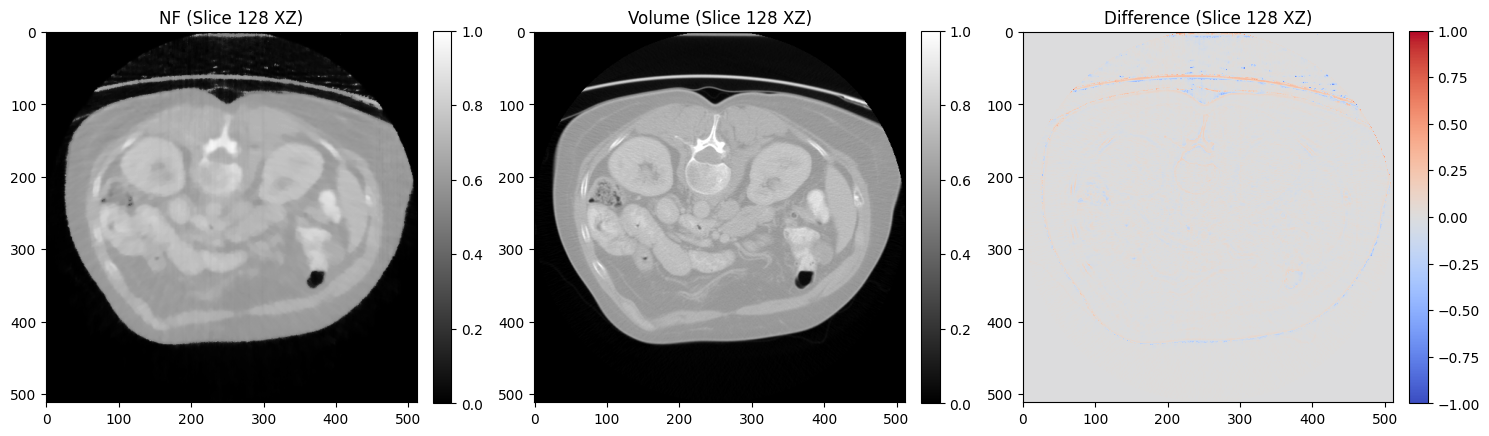

In [108]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15))

# Define a function to add colorbars
def add_colorbar(im, ax, clim):
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    im.set_clim(clim)

# Define subtitles for each plot
subtitles = [
    "NF (Slice 128 XY)", "Volume (Slice 128 XY)", "Difference (Slice 128 XY)",
    "NF (Slice 128 XZ)", "Volume (Slice 128 XZ)", "Difference (Slice 128 XZ)",
    "NF (Slice 128 YZ)", "Volume (Slice 128 YZ)", "Difference (Slice 128 YZ)"
]

slice_idx = 2
im = axs[0].imshow(outputs_temp[:,slice_idx,:],cmap="gray")
add_colorbar(im, axs[0], (0, 1))
axs[0].set_title(subtitles[3])

im = axs[1].imshow(vol_temp[:,slice_idx,:],cmap="gray")
add_colorbar(im, axs[1], (0, 1))
axs[1].set_title(subtitles[4])

im = axs[2].imshow(vol_temp[:,slice_idx,:] - outputs_temp[:,slice_idx,:],interpolation="none",cmap="coolwarm")
add_colorbar(im, axs[2], (-1, 1))
axs[2].set_title(subtitles[5])

plt.tight_layout()
plt.show()

In [118]:
slice_idx = 3
torch.mean((vol_temp[:,slice_idx,:] - outputs_temp[:,slice_idx,:])**2)

tensor(0.0038)

# Fix bugnist

In [63]:
import pandas as pd
from tifffile import imread
from glob import glob

In [180]:
files = glob(f"{_PATH_DATA}/bugnist_256/SL_clean/*.tif")
temp = {}
for file in files:
    temp["/".join(file.split("/")[-4:])] = imread(file).shape
df = pd.DataFrame(data={"file_name":files})
df["file_name"] = df.file_name.apply(lambda x: "/".join(x.split("/")[-4:]))
df["size"] = df.file_name.apply(lambda x: temp[x])
df["x"] = df["size"].apply(lambda x: x[0])
df["y"] = df["size"].apply(lambda x: x[1])
df["z"] = df["size"].apply(lambda x: x[2])
for i in df.index.to_list():
    if not df.iloc[i].x > df.iloc[i].y > df.iloc[i].z:
        first_dim = np.array(df.iloc[i]["size"]).argmax()
        last_dim = np.array(df.iloc[i]["size"]).argmin()
        mid_dim = 3 - (first_dim + last_dim)
        new_order = (first_dim,mid_dim,last_dim)
    else:
        new_order = (0,1,2)
    vol = qim3d.io.load(f"../{df.iloc[i]['file_name']}").transpose(new_order)
    temp = np.zeros((192,160,128),dtype="uint8")
    if not vol.shape == temp.shape:
        if vol.shape[0]//2 * 2 != vol.shape[0]:
            x_start = temp.shape[0]//2 - vol.shape[0]//2
            x_end = temp.shape[0]//2 + vol.shape[0]//2+1
        else:
            x_start = temp.shape[0]//2 - vol.shape[0]//2
            x_end = temp.shape[0]//2 + vol.shape[0]//2
        
        if vol.shape[1]//2 * 2 != vol.shape[1]:
            y_start = temp.shape[1]//2 - vol.shape[1]//2
            y_end = temp.shape[1]//2 + vol.shape[1]//2+1
        else:
            y_start = temp.shape[1]//2 - vol.shape[1]//2
            y_end = temp.shape[1]//2 + vol.shape[1]//2
        
        if vol.shape[2]//2 * 2 != vol.shape[2]:
            z_start = temp.shape[2]//2 - vol.shape[2]//2
            z_end = temp.shape[2]//2 + vol.shape[2]//2+1
        else:
            z_start = temp.shape[2]//2 - vol.shape[2]//2
            z_end = temp.shape[2]//2 + vol.shape[2]//2
        temp[x_start:x_end,y_start:y_end,z_start:z_end] = vol
        vol = temp
    new_vol = np.abs(np.random.normal(0,10,(192,160,128))).astype("uint8")
    new_vol[vol > 10] = vol[vol > 10]
    qim3d.io.save(f"../{df.iloc[i]['file_name']}",new_vol,replace=True)

Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.7 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.7 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.7 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.7 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.3 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.9 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.8 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.9 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.9 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.9 GB (2.4%)
 • Free..: 737.1 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.9 GB (2.4%)
 • Free..: 737.2 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.9 GB (2.4%)
 • Free..: 737.1 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 17.9 GB (2.4%)
 • Free..: 737.1 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.1 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.0 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 737.0 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.1 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.9 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.3 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.2 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.3 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.3 GB (2.4%)
 • Free..: 736.8 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.4 GB (2.4%)
 • Free..: 736.6 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.6 GB (2.5%)
 • Free..: 736.5 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.4 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.8 GB (2.5%)
 • Free..: 736.3 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.9 GB (2.5%)
 • Free..: 736.2 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.0 GB (2.5%)
 • Free..: 736.1 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.1 GB (2.5%)
 • Free..: 736.0 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.8 GB (2.5%)
 • Free..: 736.2 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.4 GB (2.4%)
 • Free..: 736.6 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.4 GB (2.4%)
 • Free..: 736.6 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.6 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.4 GB (2.4%)
 • Free..: 736.6 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.5 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.6 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.5%)
 • Free..: 736.5 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.5 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.5%)
 • Free..: 736.5 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.6 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.5%)
 • Free..: 736.5 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.5 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.5%)
 • Free..: 736.5 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.5 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.5%)
 • Free..: 736.5 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.6 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.5 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.6 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.5 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.5 GB (2.4%)
 • Free..: 736.6 GB (97.6%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.6 GB (2.5%)
 • Free..: 736.5 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.9 GB (2.5%)
 • Free..: 736.2 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.0 GB (2.5%)
 • Free..: 736.0 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.1 GB (2.5%)
 • Free..: 735.9 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.9 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.9 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.2 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.5%)
 • Free..: 735.8 GB (97.5%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.8 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.3 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.7 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.4 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.6 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.5 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.4 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.5 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.4 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.4 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.6 GB (2.6%)
 • Free..: 735.4 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.7 GB (2.6%)
 • Free..: 735.4 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.8 GB (2.6%)
 • Free..: 735.3 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.8 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.8 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.8 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.8 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.8 GB (2.6%)
 • Free..: 735.2 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 19.9 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.1 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.6%)
 • Free..: 735.0 GB (97.4%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.0 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 735.0 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.1 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.9 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.4 GB (2.7%)
 • Free..: 734.7 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.7 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.5 GB (2.7%)
 • Free..: 734.5 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.5 GB (2.7%)
 • Free..: 734.6 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.5 GB (2.7%)
 • Free..: 734.6 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.5 GB (2.7%)
 • Free..: 734.6 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.4 GB (2.7%)
 • Free..: 734.7 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.4 GB (2.7%)
 • Free..: 734.7 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.5 GB (2.7%)
 • Free..: 734.5 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.2 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.7 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.7 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.7 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.7 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.7 GB (97.3%)


Loading:   0%|          | 0.00B/30.0MB  [00:00<?, ?B/s]

Loaded shape: (192, 160, 128)
Volume using 30.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 20.3 GB (2.7%)
 • Free..: 734.8 GB (97.3%)


In [181]:
files = glob(f"{_PATH_DATA}/bugnist_256/SL_cubed/*.tif")
temp = {}
for file in files:
    temp["/".join(file.split("/")[-4:])] = imread(file).shape
df = pd.DataFrame(data={"file_name":files})
df["file_name"] = df.file_name.apply(lambda x: "/".join(x.split("/")[-4:]))
df["size"] = df.file_name.apply(lambda x: temp[x])
df["x"] = df["size"].apply(lambda x: x[0])
df["y"] = df["size"].apply(lambda x: x[1])
df["z"] = df["size"].apply(lambda x: x[2])

In [182]:
df

file_name             size    x    y  \
0    data/bugnist_256/SL_clean/soldat_13_037.tif  (192, 160, 128)  192  160   
1     data/bugnist_256/SL_clean/soldat_2_016.tif  (192, 160, 128)  192  160   
2    data/bugnist_256/SL_clean/soldat_10_017.tif  (192, 160, 128)  192  160   
3    data/bugnist_256/SL_clean/soldat_10_008.tif  (192, 160, 128)  192  160   
4    data/bugnist_256/SL_clean/soldat_11_032.tif  (192, 160, 128)  192  160   
..                                           ...              ...  ...  ...   
734  data/bugnist_256/SL_clean/soldat_13_008.tif  (192, 160, 128)  192  160   
735  data/bugnist_256/SL_clean/soldat_13_000.tif  (192, 160, 128)  192  160   
736  data/bugnist_256/SL_clean/soldat_11_030.tif  (192, 160, 128)  192  160   
737   data/bugnist_256/SL_clean/soldat_8_037.tif  (192, 160, 128)  192  160   
738  data/bugnist_256/SL_clean/soldat_14_034.tif  (192, 160, 128)  192  160   

       z  
0    128  
1    128  
2    128  
3    128  
4    128  
..   ...  
734  128  
735  128  
736  128  
737  128  
738  128  

[739 rows x 5 columns]

In [66]:
files = glob(f"{_PATH_DATA}/bugnist_256/SL_cubed/*.tif")
temp = {}
for file in files:
    temp["/".join(file.split("/")[-4:])] = imread(file).shape
df = pd.DataFrame(data={"file_name":files})
df_train = df[:50]
df_test = df[50:]

In [68]:
df_train.to_csv(f"{_PATH_DATA}/bugnist_256/SL_ray_files.csv",index=False)

In [69]:
df_test.to_csv(f"{_PATH_DATA}/bugnist_256/SL_test_files.csv",index=False)

In [83]:
temp = "CT-Reconstruction-Neural-Representation/data/bugnist_256/SL_1_projections.npy"

In [84]:
int(temp.split("_")[-2])

1

# Testing projection

In [1]:
import tifffile
from src import _PATH_DATA
from src.dataloaders import CTDataModule
import numpy as np
from tqdm import tqdm
import scipy
import torch
import matplotlib.pyplot as plt
from src.models.mlp import compute_projection_values

/work3/s164564/envs/renner/lib/python3.10/site-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Generating points from rays:   0%|                                             | 0/50 [00:00<?, ?it/s]/work3/s164564/CT-Reconstruction-Neural-Representation/src/dataloaders.py:216: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.object_shape = torch.tensor(object_shape)  # Convert torch.Size to torch.Tensor
100%|█████████████████████████████████████████████████████████████████| 50/50 [00:08<00:00,  6.05it/s]


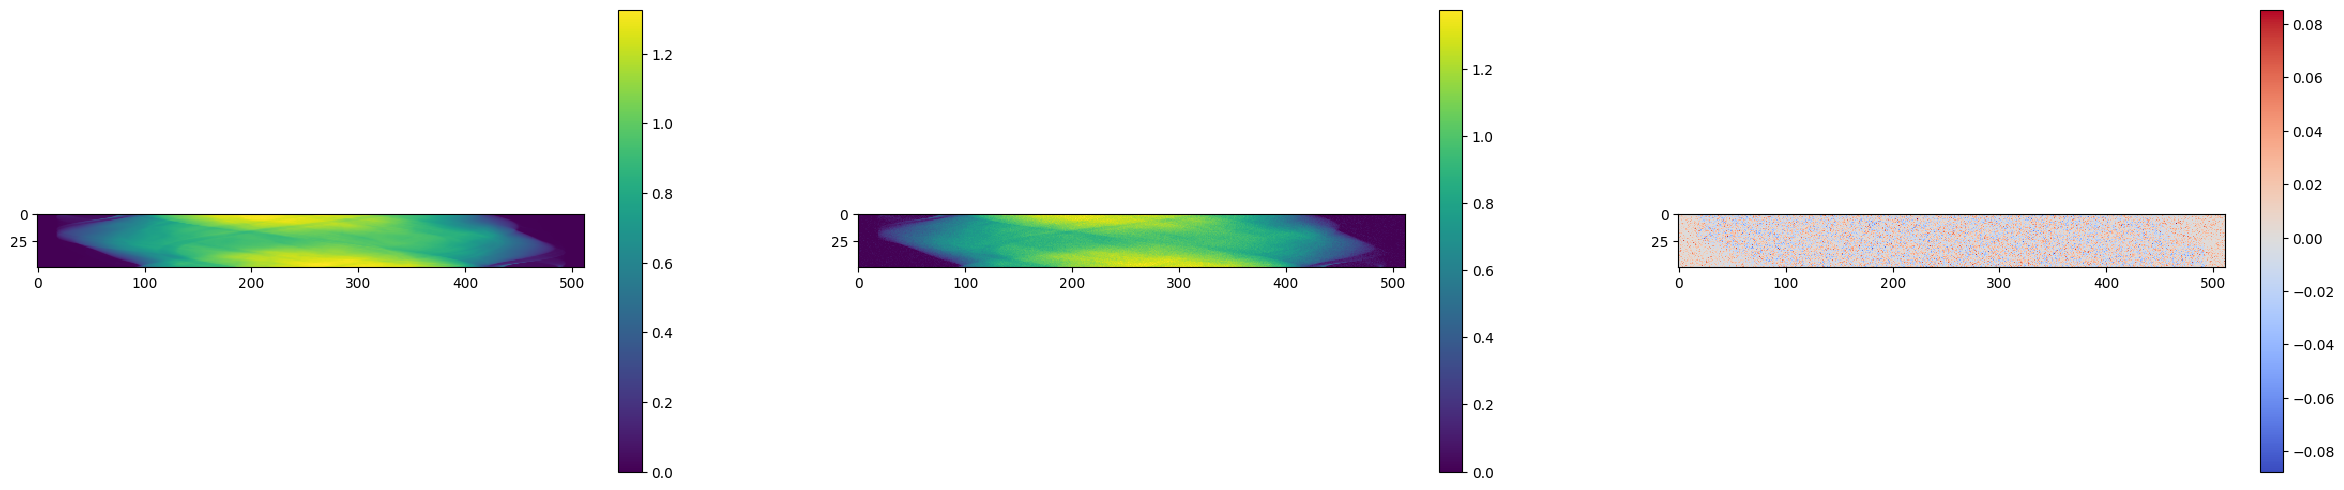

In [2]:
args_dict = {
    "general": {
        "experiment_name": "test",
        "data_path":f'Task07_Pancreas/test_0',
        "seed":42,
        "checkpoint_path":None,
        "beam_type":"cone",
        
    },
    "training": {
        "num_epochs": 1,
        "batch_size": 100,
        "model_lr":1e-4,
        "latent_lr":1e-4,
        "discriminator_lr":1e-4,
        "device":"cuda",
        "num_workers":0,
        "num_points":512,
        "imagefit_mode":False,
        "noisy_points":False,
        "regularization_weight":1e-1,
        "noise_level":0.03,
        "full_mode":False,
        "adversarial_mode":True,
    },
    "model": { 
        "model_type": "neuralfield",
        "num_hidden_layers": 4,
        "num_hidden_features": 256,
        "num_freq_bands": 6,
        "encoder":"hashgrid",
        "activation_function": 'relu',
        "latent_size": 32,
        "volume_sidelength": (256,256,256),
    },
}
datamodule = CTDataModule(args_dict)
datamodule.setup("test")

vol = datamodule.test_dataset.vol.numpy()

grid = (
    np.linspace(0, vol.shape[0] - 1, vol.shape[0]),
    np.linspace(0, vol.shape[1] - 1, vol.shape[1]),
    np.linspace(0, vol.shape[2] - 1, vol.shape[2]),
)
all_detector_values = []
last_idx = 0
for i in tqdm(range(50)):
    projection_shape = datamodule.test_dataset.projections.shape
    valid_indices = datamodule.test_dataset.valid_rays
    valid_indices = valid_indices.view(projection_shape)
    next_idx = torch.sum(valid_indices[i])
    
    points,_ = datamodule.test_dataset.sample_points(datamodule.test_dataset.start_points[last_idx:last_idx+next_idx],
                                                   datamodule.test_dataset.end_points[last_idx:last_idx+next_idx],
                                                   args_dict["training"]["num_points"])

    
    # Adjust interpolation scaling
    scaled_points = (
        points * (np.array(vol.shape) / 2) + (np.array(vol.shape) / 2 - 0.5)
    )
    attenuation_values = scipy.interpolate.interpn(
        grid,
        vol,
        scaled_points,
        bounds_error=False,
        fill_value=0,
    )
    
    lengths = torch.linalg.norm((points[:, -1, :] - points[:, 0, :]), dim=1)
    pred = compute_projection_values(points.shape[1], torch.tensor(attenuation_values), lengths)

    detector_value_hat = np.zeros((projection_shape[1], projection_shape[2]))
    detector_value_hat[valid_indices[i]] = pred.numpy()

    last_idx += next_idx

    all_detector_values.append(detector_value_hat)

all_detector_values = np.array(all_detector_values)

fig, ax = plt.subplots(1, 3, figsize=(30, 6))
mine = ax[0].imshow(all_detector_values,interpolation="none")
astra = ax[1].imshow(datamodule.test_dataset.projections,interpolation="none")
difference = datamodule.test_dataset.projections-all_detector_values
diff = ax[2].imshow(difference,interpolation="none",cmap="coolwarm")
fig.colorbar(mine,ax=ax[0])
fig.colorbar(astra,ax=ax[1])
fig.colorbar(diff,ax=ax[2])
plt.show()
    

# Imagefit test

In [1]:
import os
import math
import logging
import datetime
import argparse
import numpy as np
import pandas as pd
import h5py

import torch
import torch._dynamo
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.callbacks import (
    EarlyStopping,
    LearningRateMonitor,
    ModelCheckpoint,
)
from lightning.pytorch.profilers import PyTorchProfiler, SimpleProfiler
from pytorch_lightning.loggers import WandbLogger
import wandb

from src import _PATH_DATA, _PATH_MODELS, _PROJECT_ROOT
from src.dataloaders import CTDataModule, ImagefitDataModule
from src.models.mlp import NeuralField
from src.models.nfraygan import RayGAN
from src import get_device

torch._dynamo.config.suppress_errors = True

def main(args_dict):
    seed_everything(args_dict["general"]["seed"], workers=True)
    torch.set_float32_matmul_precision("medium")
    time = str(datetime.datetime.now())[:-10].replace(" ", "-").replace(":", "")

    datamodule = ImagefitDataModule(args_dict)
    projection_shape = None
    model = NeuralField(
        args_dict,
        projection_shape=projection_shape,
    )
    lr_monitor = LearningRateMonitor(logging_interval="epoch")

    wandb_logger = WandbLogger(
        project="Renner",
        name=f"{args_dict['general']['experiment_name']}_{args_dict['model']['encoder']}_{args_dict['model']['activation_function']}",
    )

    checkpoint_callback = ModelCheckpoint(
        dirpath=f"{_PATH_MODELS}/{args_dict['general']['experiment_name']}_{args_dict['model']['encoder']}_{args_dict['model']['activation_function']}-{time}",
        filename="MLP-{epoch}",
        monitor="train/loss",
        mode="min",
        save_top_k=1,
        save_last=True,
        auto_insert_metric_name=True,
        save_on_train_epoch_end=True,
    )

        
    trainer = Trainer(
        max_epochs=args_dict["training"]["num_epochs"],
        devices=-1,
        accelerator="gpu",
        deterministic=False,
        default_root_dir=_PROJECT_ROOT,
        precision="16-mixed",
        callbacks=[checkpoint_callback, lr_monitor],
        log_every_n_steps=10,
        logger=wandb_logger,
        num_sanity_val_steps=0,
        check_val_every_n_epoch=1,
        accumulate_grad_batches=1,
        # profiler=profiler,
            )
    trainer.fit(
        model,
        datamodule=datamodule,
    )

In [2]:
args_dict = {
    "general": {
        "experiment_name": "test",
        "data_path":f'Citrus/volume_0.tif',
        "seed":42,
        "checkpoint_path":None,
        "beam_type":"cone",
        
    },
    "training": {
        "num_epochs": 1,
        "batch_size": 10,
        "model_lr":1e-4,
        "latent_lr":1e-4,
        "discriminator_lr":1e-4,
        "device":"cuda",
        "num_workers":4,
        "num_points":512,
        "imagefit_mode":True,
        "noisy_points":False,
        "regularization_weight":1e-1,
        "noise_level":0.03,
        "full_mode":False,
        "adversarial_mode":False,
    },
    "model": { 
        "model_type": "neuralfield",
        "num_hidden_layers": 4,
        "num_hidden_features": 256,
        "num_freq_bands": 6,
        "encoder":None,
        "activation_function": 'sine',
        "latent_size": 32,
        "volume_sidelength": (256,256,256),
    },
}

In [ ]:
main(args_dict)